# This notebook is dedicated to GSE112622 analysis

See `GSE112622Experiment` in `epigenome` project.
This experiment provides information per gene.
For each gene:
* _PEAKS - number of peaks intersecting with gene body for TOOL
* _COVERAGE - information about percentage of gene body length covered by peaks for TOOL
* _RPM / _RPKM - normalized reads coverage in gene body
* _TPM / _FPKM - transcript per million reads provided by RSEM

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from IPython.display import display
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import scipy as sp
import os

FOLDER='/mnt/stripe/bio/experiments/gse112622'

df = pd.read_csv(os.path.join(FOLDER, 'data.tsv'), sep='\t', comment='#')
# Filter out only protein coding genes
df = df.loc[df['coding'] == 1]
display(df.columns)

Index(['gene_id', 'gene_symbol', 'coding', 'chr', 'start', 'end', 'FPKM_0_0',
       'FPKM_0_1', 'FPKM_1_0', 'FPKM_1_1', 'TPM_0_0', 'TPM_0_1', 'TPM_1_0',
       'TPM_1_1', 'k36me3_MACS2_COVERAGE_0', 'k36me3_MACS2_COVERAGE_1',
       'k36me3_MACS2_PEAKS_0', 'k36me3_MACS2_PEAKS_1', 'k36me3_RPKM_0',
       'k36me3_RPKM_1', 'k36me3_RPM_0', 'k36me3_RPM_1',
       'k36me3_SICER_COVERAGE_0', 'k36me3_SICER_COVERAGE_1',
       'k36me3_SICER_PEAKS_0', 'k36me3_SICER_PEAKS_1',
       'k36me3_SPAN_COVERAGE_0', 'k36me3_SPAN_COVERAGE_1',
       'k36me3_SPAN_PEAKS_0', 'k36me3_SPAN_PEAKS_1'],
      dtype='object')

# ChIP-Seq H3K36me3 analysis

Processing RPKM
Processing RPKM limited


,gene_id,gene_symbol,coding,chr,start,end,FPKM_0_0,FPKM_0_1,FPKM_1_0,FPKM_1_1,...,k36me3_RPM_0,k36me3_RPM_1,k36me3_SICER_COVERAGE_0,k36me3_SICER_COVERAGE_1,k36me3_SICER_PEAKS_0,k36me3_SICER_PEAKS_1,k36me3_SPAN_COVERAGE_0,k36me3_SPAN_COVERAGE_1,k36me3_SPAN_PEAKS_0,k36me3_SPAN_PEAKS_1
9888,ENSMUSG00000061971,Gm10106,1,chr9,3032084,3032822,0.00,0.00,0.00,0.00,...,203.800068,253.105938,1.0,1.0,1.0,1.0,1.00000,1.00000,1.0,1.0
10246,ENSMUSG00000074561,Gm10717,1,chr9,3025416,3026387,0.00,0.09,0.00,0.10,...,335.904998,415.353334,1.0,1.0,1.0,1.0,1.00000,1.00000,1.0,1.0
10247,ENSMUSG00000074562,Gm10718,1,chr9,3023546,3025218,0.32,1.21,0.93,1.22,...,674.465372,775.182004,1.0,1.0,1.0,1.0,1.00000,1.00000,1.0,1.0
10251,ENSMUSG00000091028,Gm10722,1,chr9,3000921,3002330,0.00,0.03,0.11,0.00,...,497.882902,617.982304,1.0,1.0,1.0,1.0,1.00000,1.00000,1.0,1.0
10282,ENSMUSG00000075014,Gm10800,1,chr2,98506703,98507458,3.71,2.94,6.20,8.09,...,501.202122,544.430151,1.0,1.0,1.0,1.0,1.00000,1.00000,1.0,1.0
10283,ENSMUSG00000075015,Gm10801,1,chr2,98502393,98504240,0.25,0.69,2.06,2.00,...,562.939602,645.384087,1.0,1.0,1.0,1.0,0.99621,0.99621,1.0,1.0
28987,ENSMUSG00000023764,Sfi1,1,chr11,3031852,3093466,11.47,15.65,69.14,62.40,...,6852.860268,21888.255387,1.0,1.0,1.0,1.0,1.00000,1.00000,1.0,1.0


Processing MACS2
Compute intersection
Correlation (0.41248650902604606, 0.0)
Processing SICER
Compute intersection
Correlation (0.7598021337530254, 0.0)
Processing SPAN
Compute intersection
Correlation (0.7475474809978842, 0.0)


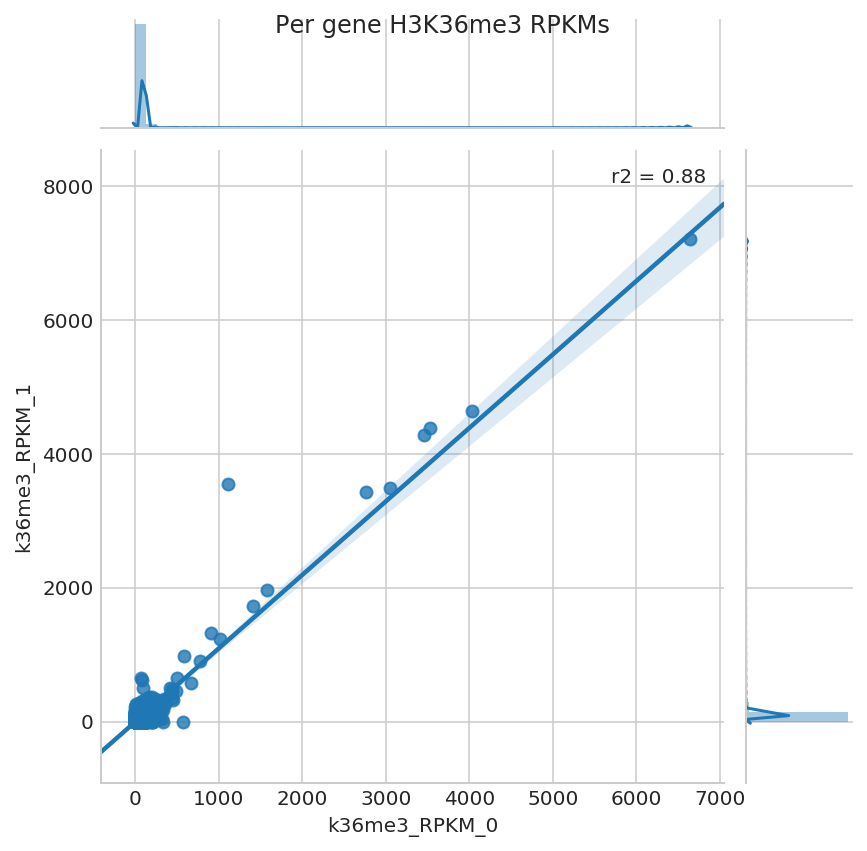

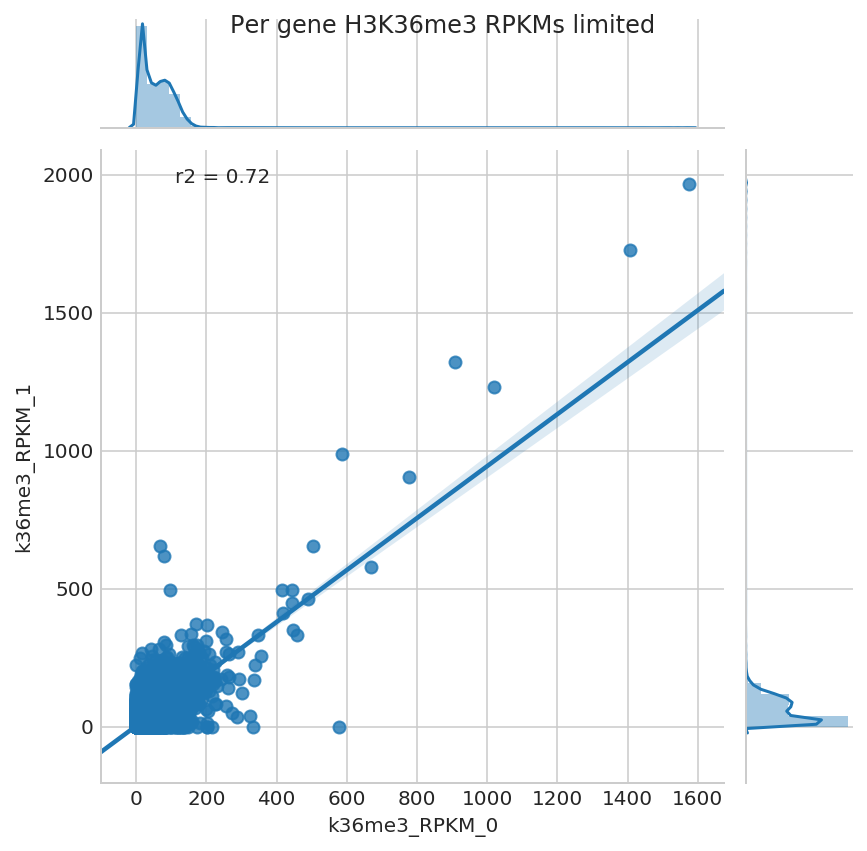

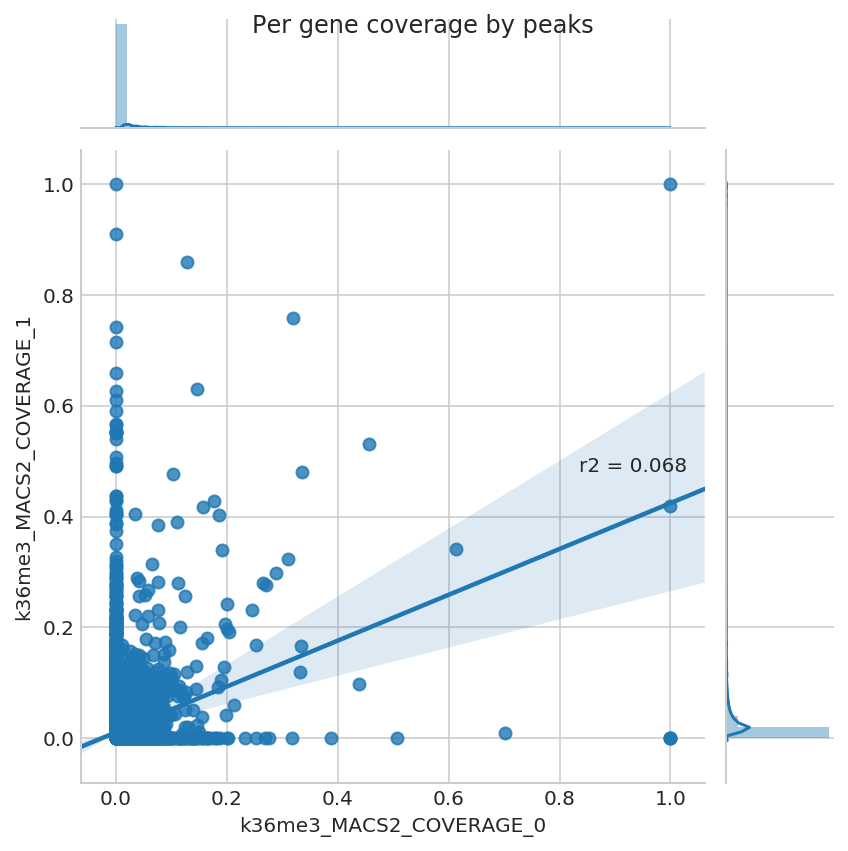

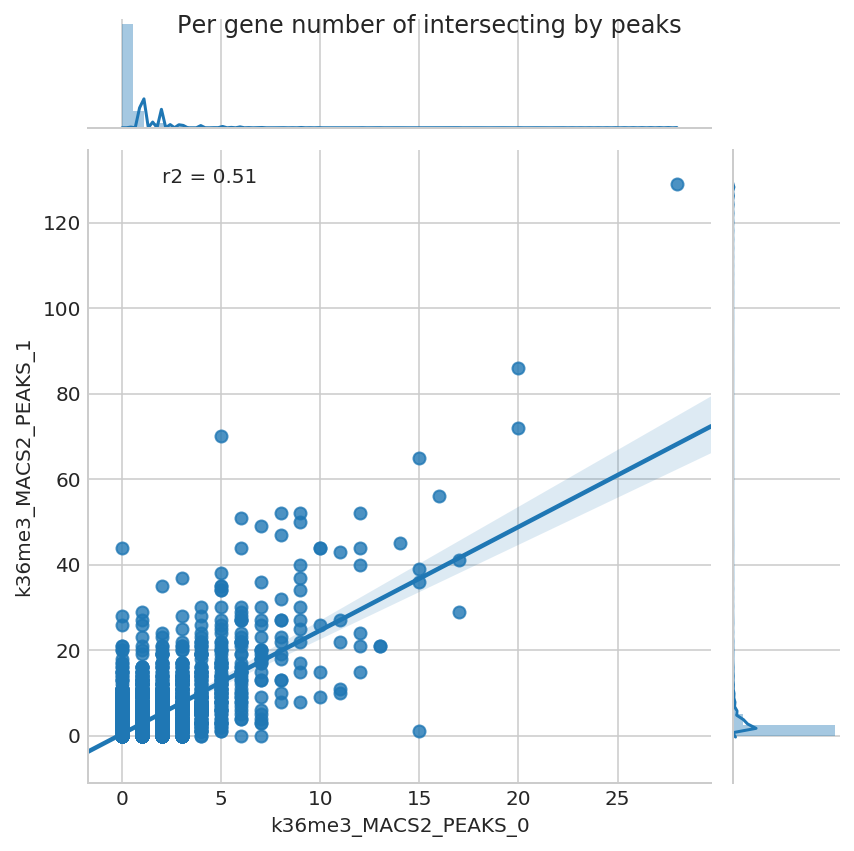

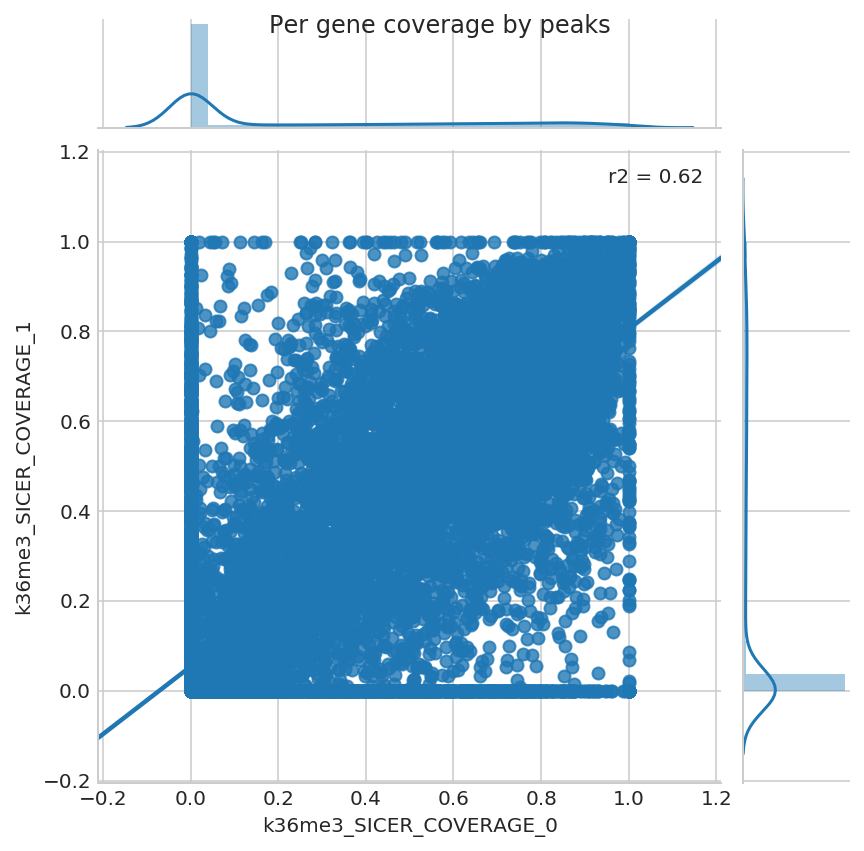

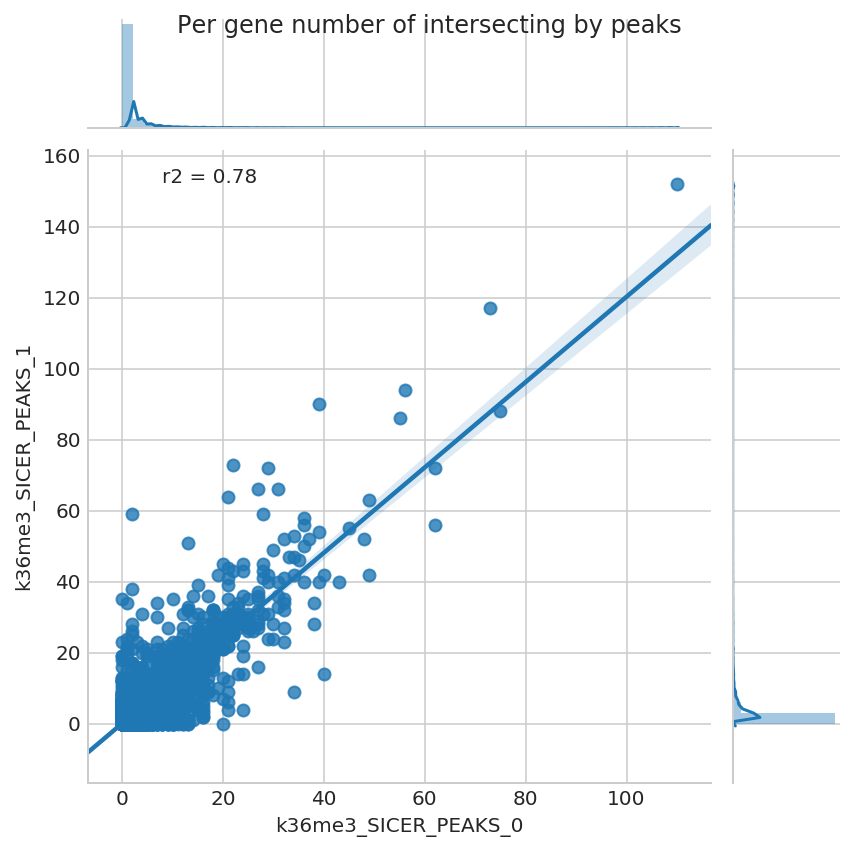

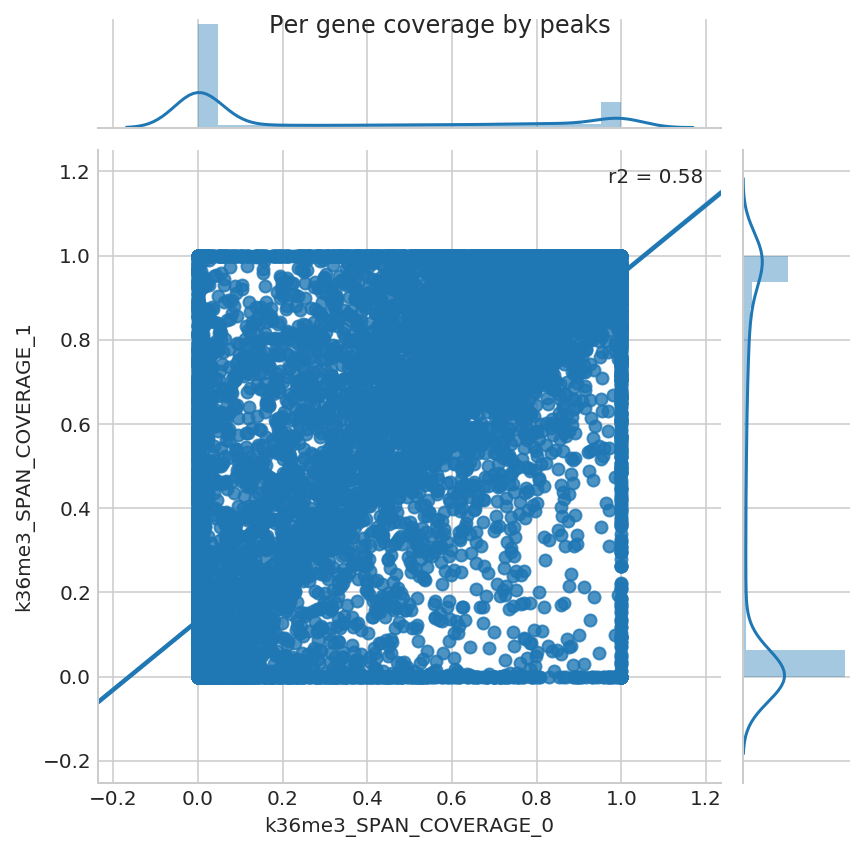

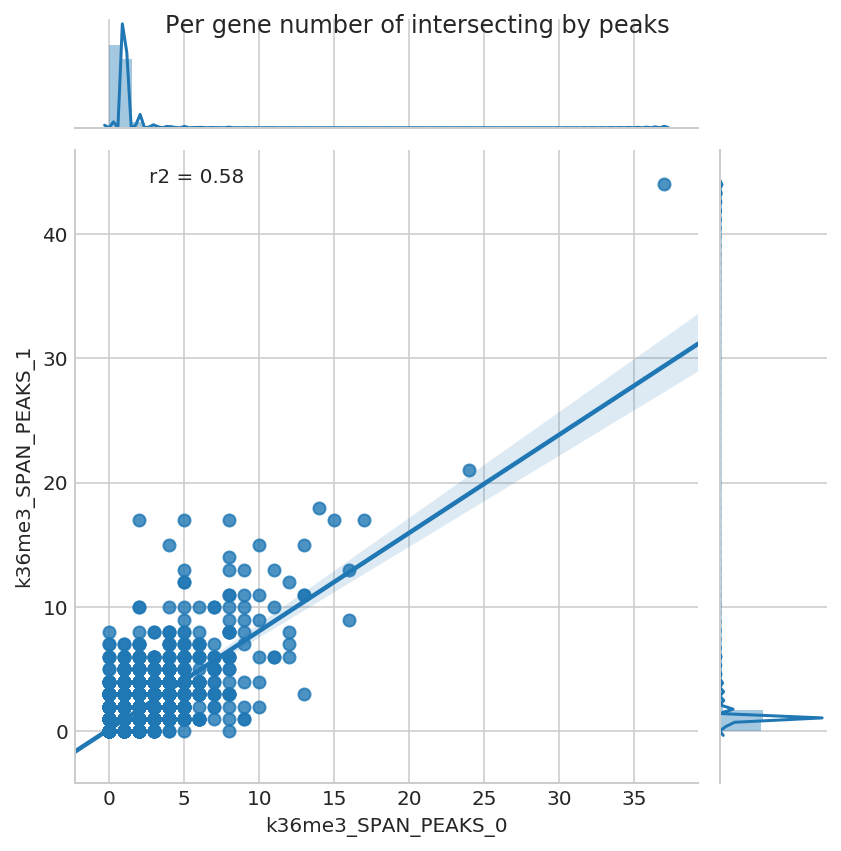

In [2]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

print('Processing RPKM')
with PdfPages(os.path.join(FOLDER, 'gse112622_rpkm_all.pdf')) as pdf:        
    plt.figure(figsize=(10, 10))
    sns.jointplot(df['k36me3_RPKM_0'], 
                  df['k36me3_RPKM_1'], kind="reg", stat_func=r2)
    plt.suptitle('Per gene H3K36me3 RPKMs')    
    pdf.savefig()

print('Processing RPKM limited')
rpkm_filter = np.logical_and(df['k36me3_RPKM_0'] < 2e3, 
                             df['k36me3_RPKM_1'] < 2e3)
display(df.loc[np.logical_not(rpkm_filter)])
df = df.loc[rpkm_filter]

with PdfPages(os.path.join(FOLDER, 'gse112622_rpkm.pdf')) as pdf:        
    plt.figure(figsize=(5, 5))
    sns.jointplot(df['k36me3_RPKM_0'], 
                  df['k36me3_RPKM_1'], kind="reg", stat_func=r2)
    plt.suptitle('Per gene H3K36me3 RPKMs limited')
    pdf.savefig()

    
TOOLS = ["MACS2", "SICER", "SPAN"]
for tool in TOOLS:
    print('Processing', tool)
    with PdfPages(os.path.join(FOLDER, 'gse112622_{}_coverage.pdf'.format(tool))) as pdf:
        plt.figure(figsize=(5, 5))
        sns.jointplot(df['k36me3_{}_COVERAGE_0'.format(tool)], 
                      df['k36me3_{}_COVERAGE_1'.format(tool)], kind="reg", stat_func=r2)
        plt.suptitle('Per gene coverage by peaks')
        pdf.savefig()
    with PdfPages(os.path.join(FOLDER, 'gse112622_{}_peaks.pdf'.format(tool))) as pdf:        
        plt.figure(figsize=(5, 5))
        sns.jointplot(df['k36me3_{}_PEAKS_0'.format(tool)], 
                      df['k36me3_{}_PEAKS_1'.format(tool)], kind="reg", stat_func=r2)
        plt.suptitle('Per gene number of intersecting by peaks')
        pdf.savefig()
    
    print('Compute intersection')
    for sample in [0, 1]:
        df['k36me3_{}_intersect_{}'.format(tool, sample)] = df['k36me3_{}_PEAKS_{}'.format(tool, sample)] > 0
    print('Correlation ' + str(sp.stats.pearsonr(
        df['k36me3_{}_intersect_0'.format(tool)],
        df['k36me3_{}_intersect_1'.format(tool)])))        

# TPM Log(1+x) and correspondence

/home/user/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


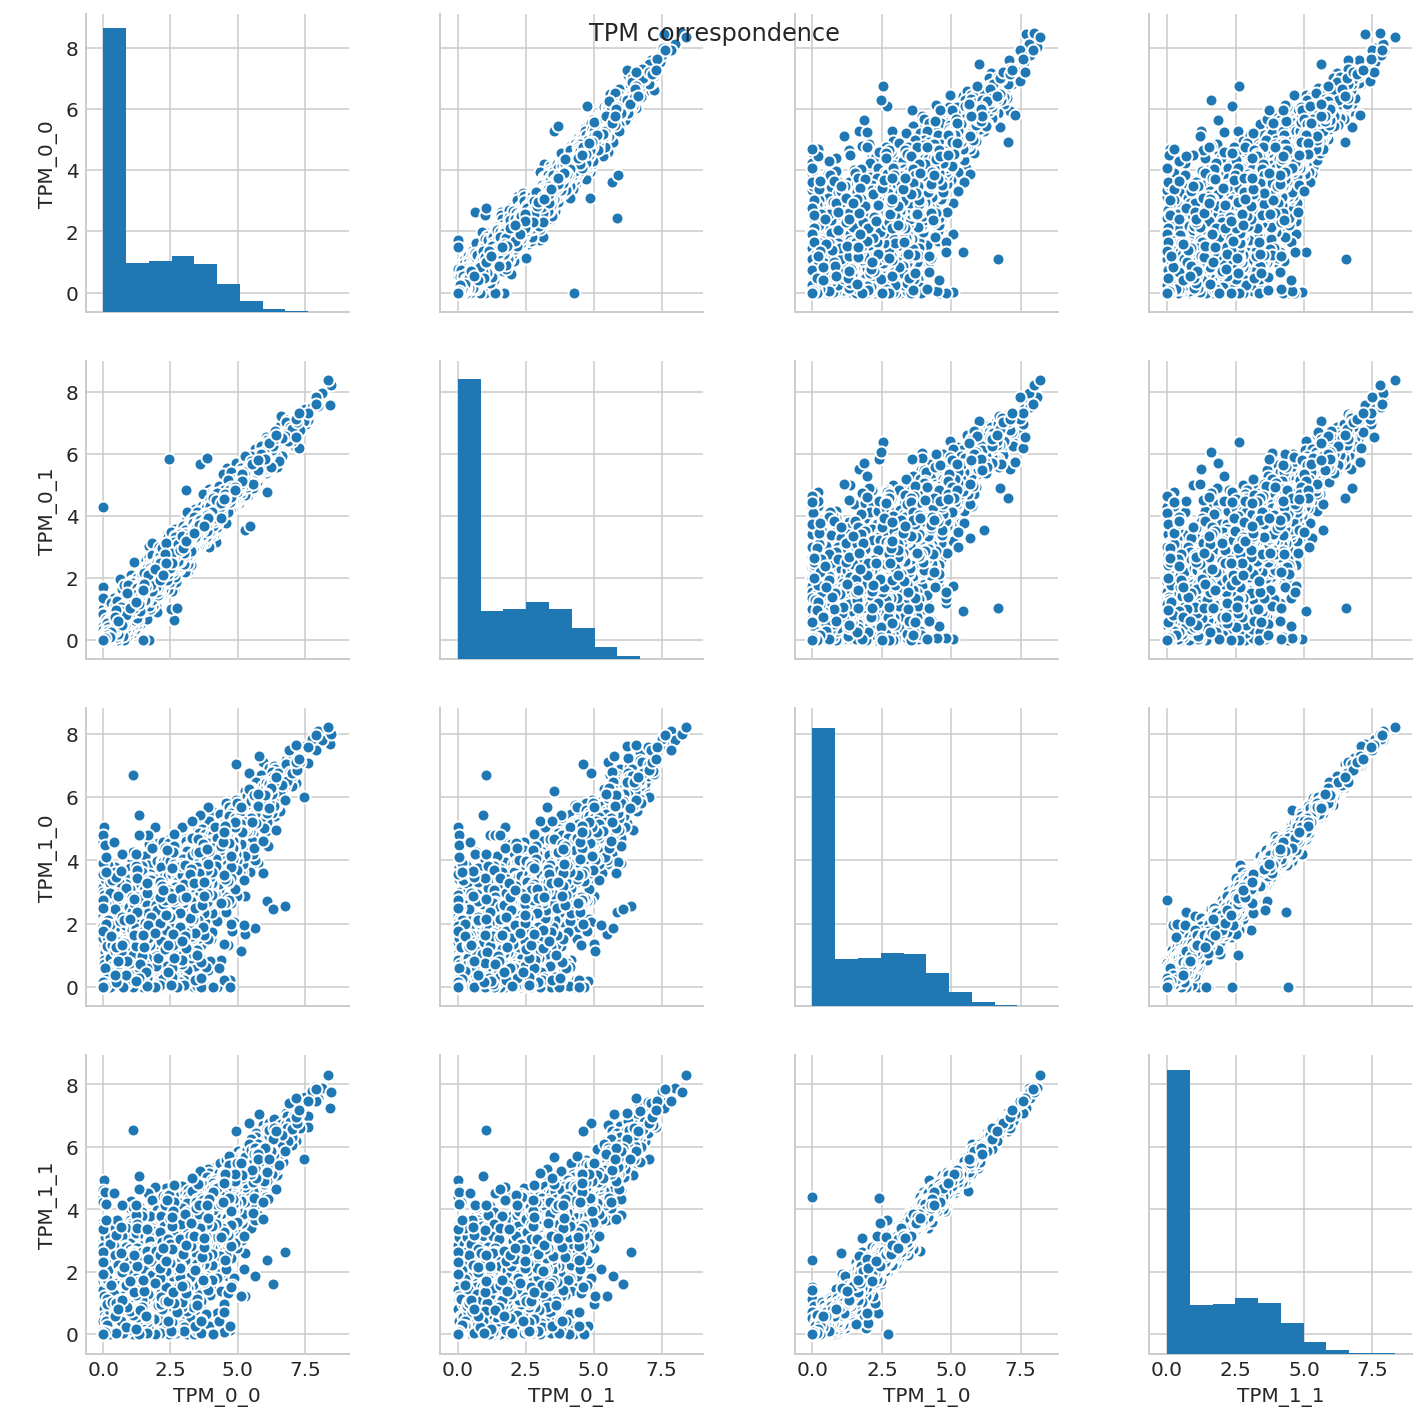

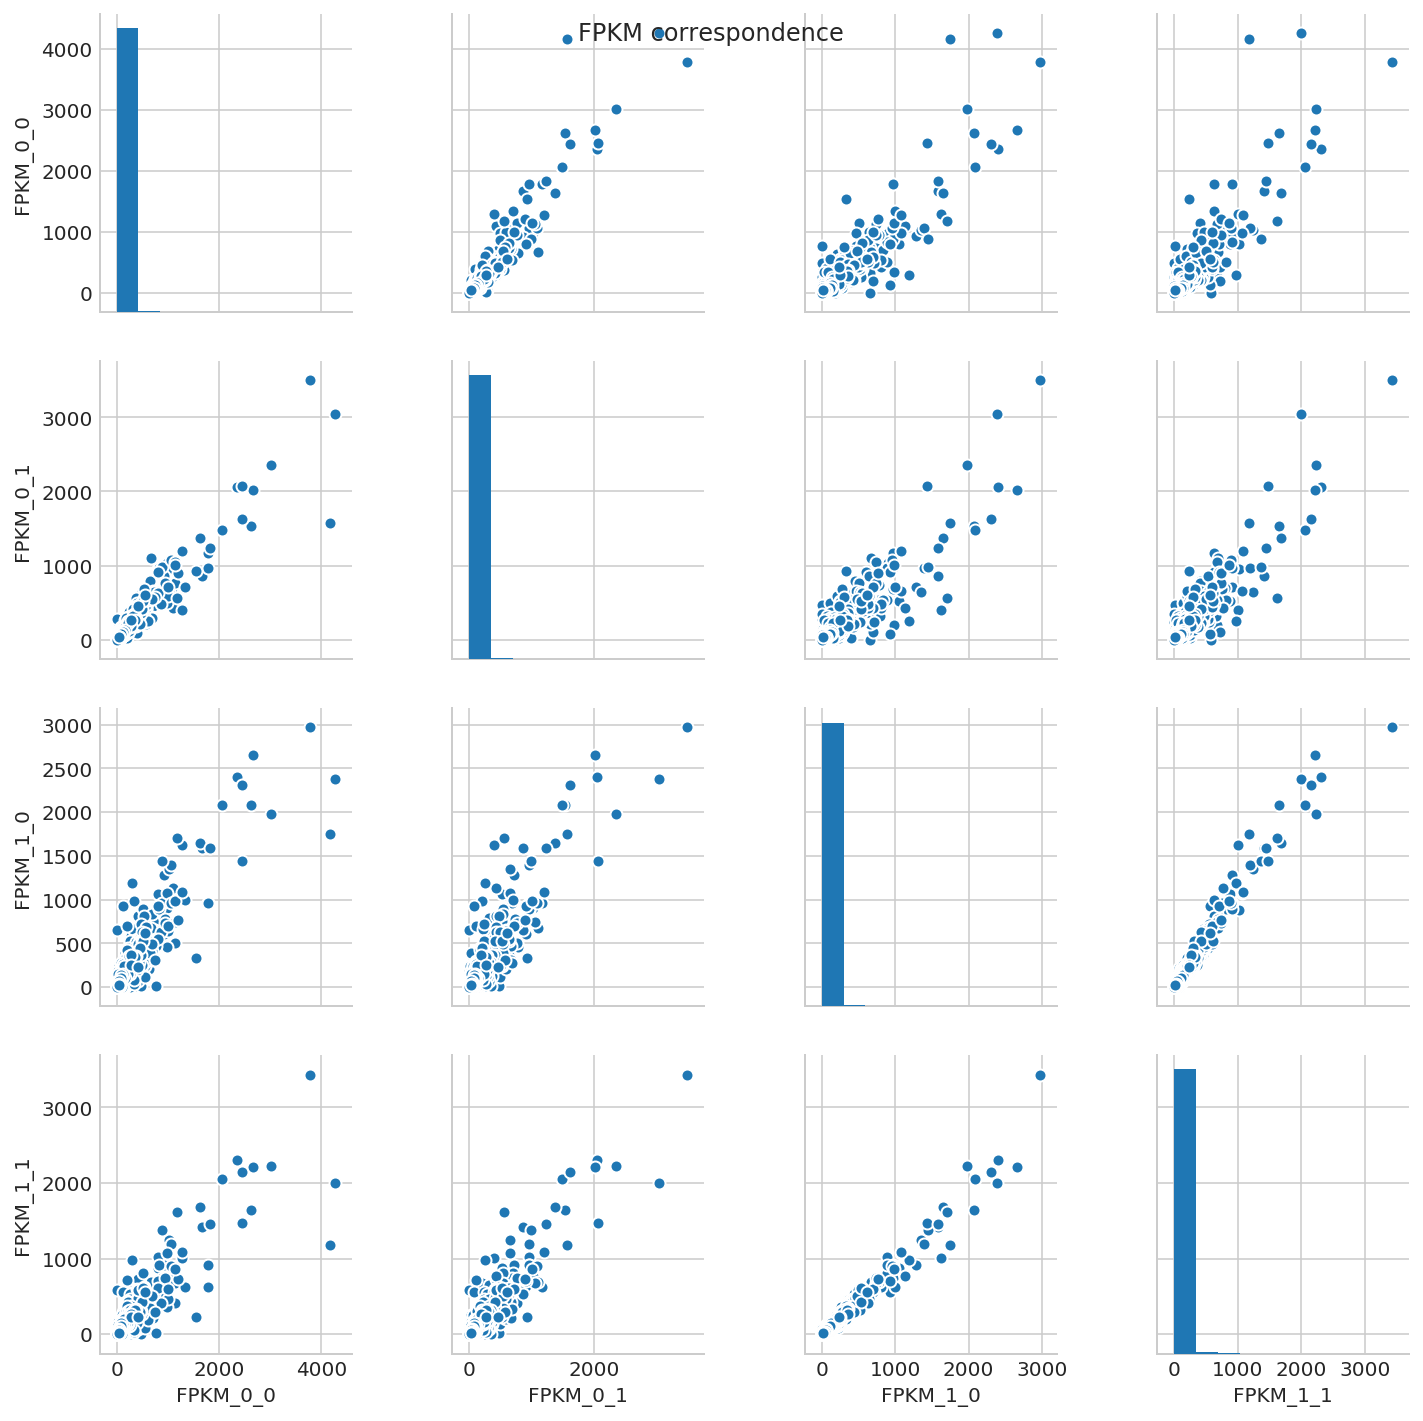

In [3]:
# # Quantile normalization
# def quantile(df):
#     dfq = df.copy()
#     #compute rank
#     dic = {}
#     for col in dfq:
#         dic.update({col : sorted(dfq[col])})
#     sorted_df = pd.DataFrame(dic)
#     rank = sorted_df.mean(axis = 1).tolist()
#     #sort
#     for col in dfq:
#         t = np.searchsorted(np.sort(dfq[col]), dfq[col])
#         dfq[col] = [rank[i] for i in t]
#     return dfq

dfq = df[['gene_id', 'FPKM_0_0', 'FPKM_0_1', 'FPKM_1_0', 'FPKM_1_1']]

# Log2 normalize 
for c in ['TPM_0_0', 'TPM_0_1', 'TPM_1_0', 'TPM_1_1']:
    dfq[c] = np.log(1 + df[c])

# Quantile normalize
# dfq = quantile(dfq)

with PdfPages(os.path.join(FOLDER, 'gse112622_tpm.pdf')) as pdf:
    plt.figure(figsize=(5, 5))
    sns.pairplot(dfq[['TPM_0_0', 'TPM_0_1', 'TPM_1_0', 'TPM_1_1']])
    plt.tight_layout()
    plt.suptitle('TPM correspondence')
    pdf.savefig()

with PdfPages(os.path.join(FOLDER, 'gse112622_fpkm.pdf')) as pdf:
    plt.figure(figsize=(5, 5))
    sns.pairplot(dfq[['FPKM_0_0', 'FPKM_0_1', 'FPKM_1_0', 'FPKM_1_1']])
    plt.tight_layout()
    plt.suptitle('FPKM correspondence')
    pdf.savefig()    

In [4]:
dfq['TPM_0'] = (dfq['TPM_0_0'] + dfq['TPM_0_1']) / 2
dfq['TPM_1'] = (dfq['TPM_1_0'] + dfq['TPM_1_1']) / 2
dfq['TPM'] = (dfq['TPM_0'] + dfq['TPM_1']) / 2

dfq['FPKM_0'] = (dfq['FPKM_0_0'] + dfq['FPKM_0_1']) / 2
dfq['FPKM_1'] = (dfq['FPKM_1_0'] + dfq['FPKM_1_1']) / 2
dfq['FPKM'] = (dfq['FPKM_0'] + dfq['FPKM_1']) / 2

# Top expressed genes and not expressed genes
print('Top expressed genes')
print('\t'.join(dfq.sort_values(by=['TPM'], ascending=False)[:20]['gene_id']))

print('Top not expressed genes')
print('\t'.join(dfq.sort_values(by=['TPM'])[:20]['gene_id']))

dff = df.copy()
dff[dfq.columns] = dfq

/home/user/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/user/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/user/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Top expressed genes
ENSMUSG00000041995	ENSMUSG00000019505	ENSMUSG00000042279	ENSMUSG00000030246	ENSMUSG00000018238	ENSMUSG00000029223	ENSMUSG00000057534	ENSMUSG00000060678	ENSMUSG00000034758	ENSMUSG00000021395	ENSMUSG00000040935	ENSMUSG00000063935	ENSMUSG00000049539	ENSMUSG00000008348	ENSMUSG00000004948	ENSMUSG00000016626	ENSMUSG00000074895	ENSMUSG00000063954	ENSMUSG00000064220	ENSMUSG00000045291
Top not expressed genes
ENSMUSG00000091489	ENSMUSG00000044743	ENSMUSG00000074439	ENSMUSG00000074440	ENSMUSG00000064213	ENSMUSG00000074446	ENSMUSG00000074443	ENSMUSG00000074447	ENSMUSG00000065958	ENSMUSG00000045337	ENSMUSG00000060208	ENSMUSG00000076479	ENSMUSG00000076480	ENSMUSG00000076463	ENSMUSG00000076481	ENSMUSG00000076464	ENSMUSG00000076465	ENSMUSG00000076865	ENSMUSG00000076867	ENSMUSG00000074442


/home/user/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/user/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/user/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

# TPM/FPKM vs k36me3 RPM/RPKM

TPM vs H3K36me3 RPKM


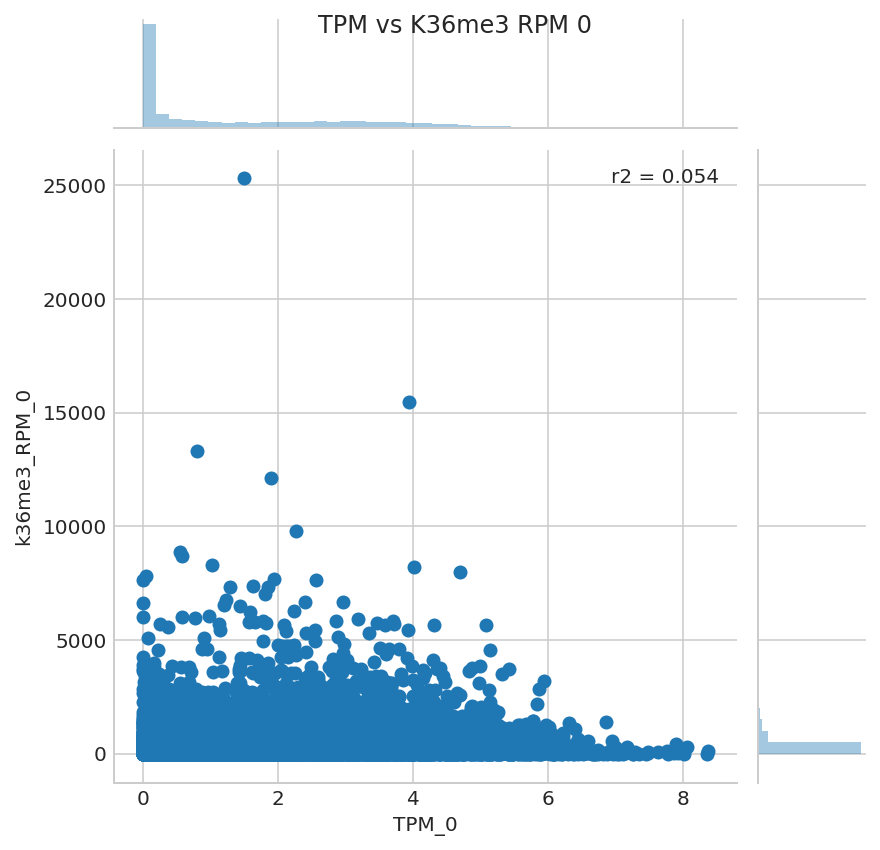

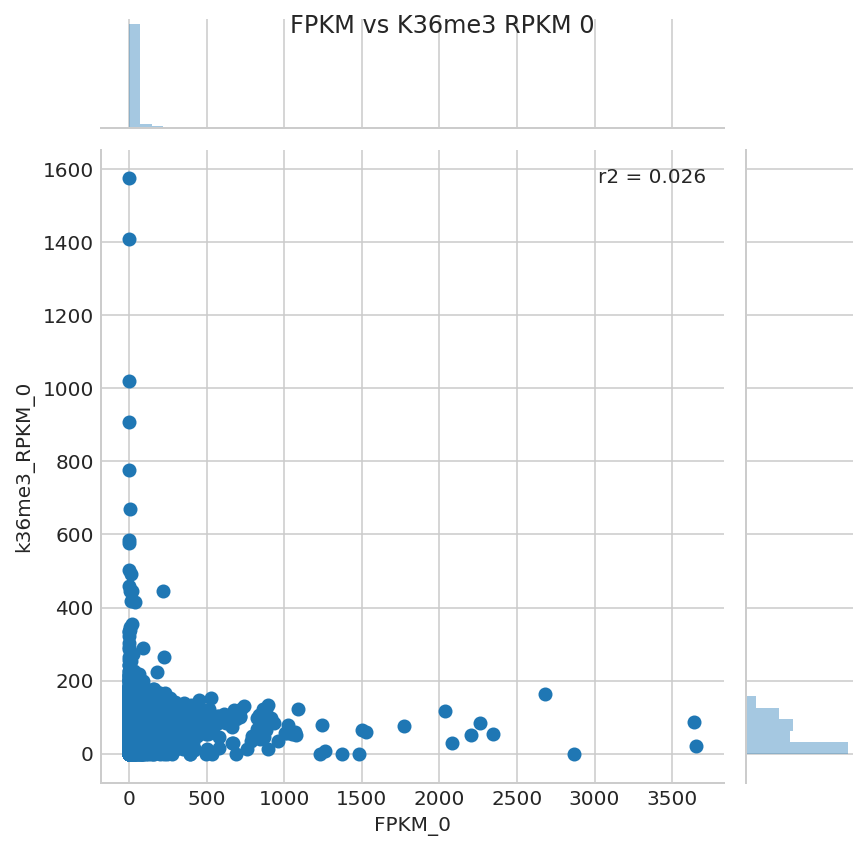

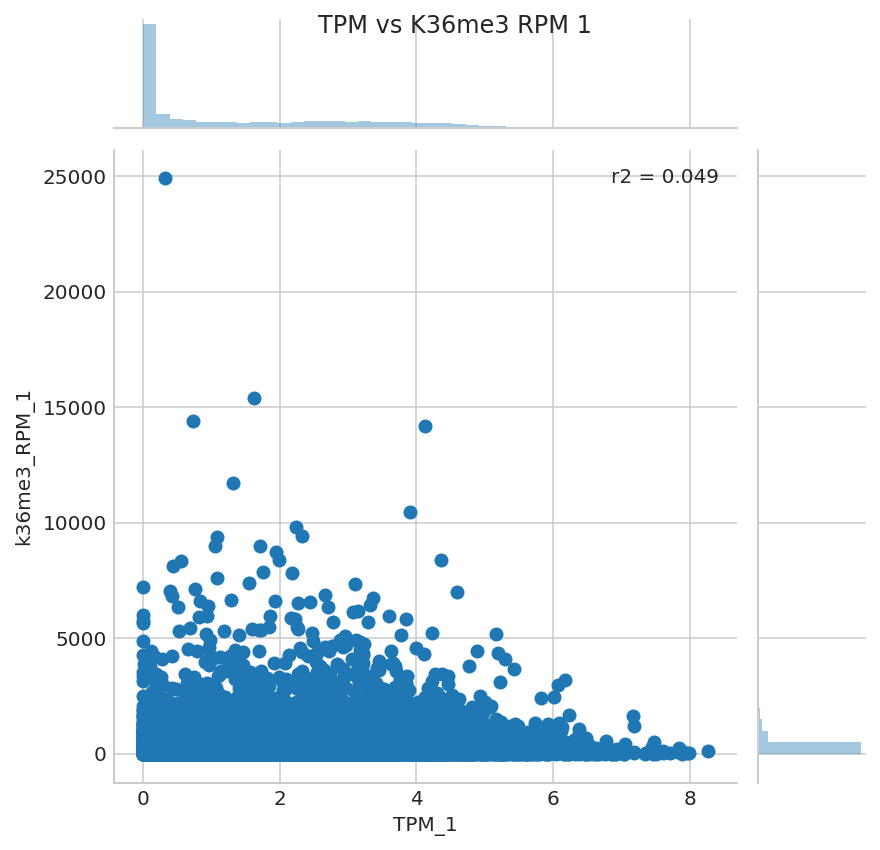

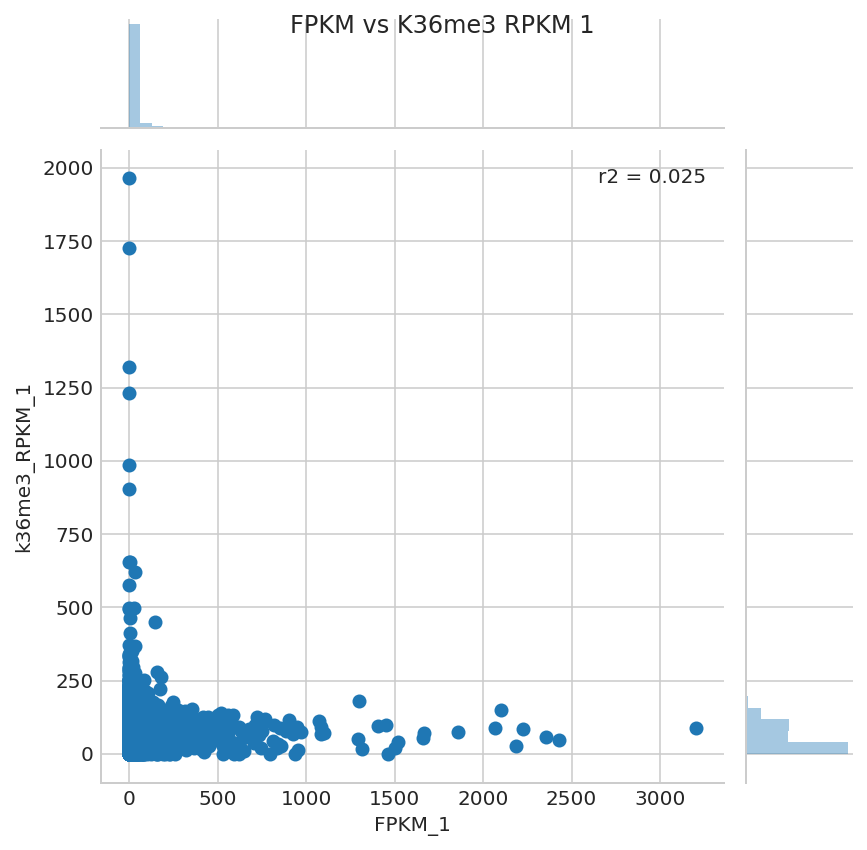

In [5]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

print('TPM vs H3K36me3 RPKM')
for s in [0, 1]:
    plt.figure(figsize=(5, 5))
    sns.jointplot(dff['TPM_{}'.format(s)], dff['k36me3_RPM_{}'.format(s)], stat_func=r2)
    plt.suptitle('TPM vs K36me3 RPM {}'.format(s))
    plt.show()
    plt.figure(figsize=(5, 5))
    sns.jointplot(dff['FPKM_{}'.format(s)], dff['k36me3_RPKM_{}'.format(s)], stat_func=r2)
    plt.suptitle('FPKM vs K36me3 RPKM {}'.format(s))
    plt.show()

# Intersection ChIP-Seq vs Expressed RNA-Seq

In [6]:
for t in TOOLS:
    print('Processing tool {}'.format(t))
    for s in [0, 1]:
        print('Processing sample {}'.format(s))
        dff['expressed_{}'.format(s)] = dff['TPM_{}'.format(s)] > 1
        print('Correlation expressed vs intersect {} {}'.format(
            s, sp.stats.pearsonr(dff['expressed_{}'.format(s)], dff['k36me3_{}_intersect_{}'.format(t, s)]))) 

        expr_intersect_filter = np.logical_and(
            dff['expressed_{}'.format(s)], 
            dff['k36me3_{}_intersect_{}'.format(t, s)])
        print('Expressed and intersect {}'.format(sum(expr_intersect_filter)))
        print('\t'.join(dff.loc[expr_intersect_filter][:20]['gene_id']))

        expr_nintersect_filter = np.logical_and(
            dff['expressed_{}'.format(s)], 
            np.logical_not(dff['k36me3_{}_intersect_{}'.format(t, s)]))
        print('Expressed and not intersect {}'.format(sum(expr_nintersect_filter)))
        print('\t'.join(dff.loc[expr_nintersect_filter][:20]['gene_id']))

        nexpr_intersect_filter = np.logical_and(
            np.logical_not(dff['expressed_{}'.format(s)]), 
            dff['k36me3_{}_intersect_{}'.format(t, s)])
        print('Not expressed and intersect {}'.format(sum(nexpr_intersect_filter)))
        print('\t'.join(dff.loc[nexpr_intersect_filter][:20]['gene_id']))

        nexpr_nintersect_filter = np.logical_and(
            np.logical_not(dff['expressed_{}'.format(s)]), 
            np.logical_not(dff['k36me3_{}_intersect_{}'.format(t, s)]))
        print('Not expressed and not intersect {}'.format(sum(nexpr_nintersect_filter)))
        print('\t'.join(dff.loc[nexpr_nintersect_filter][:20]['gene_id']))

Processing tool MACS2
Processing sample 0
Correlation expressed vs intersect 0 (0.31099482920410704, 0.0)
Expressed and intersect 3331
ENSMUSG00000025731	ENSMUSG00000027628	ENSMUSG00000044408	ENSMUSG00000037822	ENSMUSG00000022972	ENSMUSG00000030663	ENSMUSG00000090266	ENSMUSG00000042350	ENSMUSG00000024018	ENSMUSG00000026004	ENSMUSG00000048495	ENSMUSG00000033416	ENSMUSG00000038544	ENSMUSG00000026154	ENSMUSG00000053286	ENSMUSG00000022008	ENSMUSG00000058997	ENSMUSG00000030316	ENSMUSG00000002210	ENSMUSG00000042708
Expressed and not intersect 6855
ENSMUSG00000013622	ENSMUSG00000053094	ENSMUSG00000021470	ENSMUSG00000021252	ENSMUSG00000015126	ENSMUSG00000007777	ENSMUSG00000037361	ENSMUSG00000043644	ENSMUSG00000024442	ENSMUSG00000020831	ENSMUSG00000046727	ENSMUSG00000058706	ENSMUSG00000001418	ENSMUSG00000028608	ENSMUSG00000022677	ENSMUSG00000060512	ENSMUSG00000050552	ENSMUSG00000062691	ENSMUSG00000019689	ENSMUSG00000046909
Not expressed and intersect 1002
ENSMUSG00000042208	ENSMUSG00000055312	E

Compute average coverage/peaks
Transcription vs TOOLS coverage/peaks


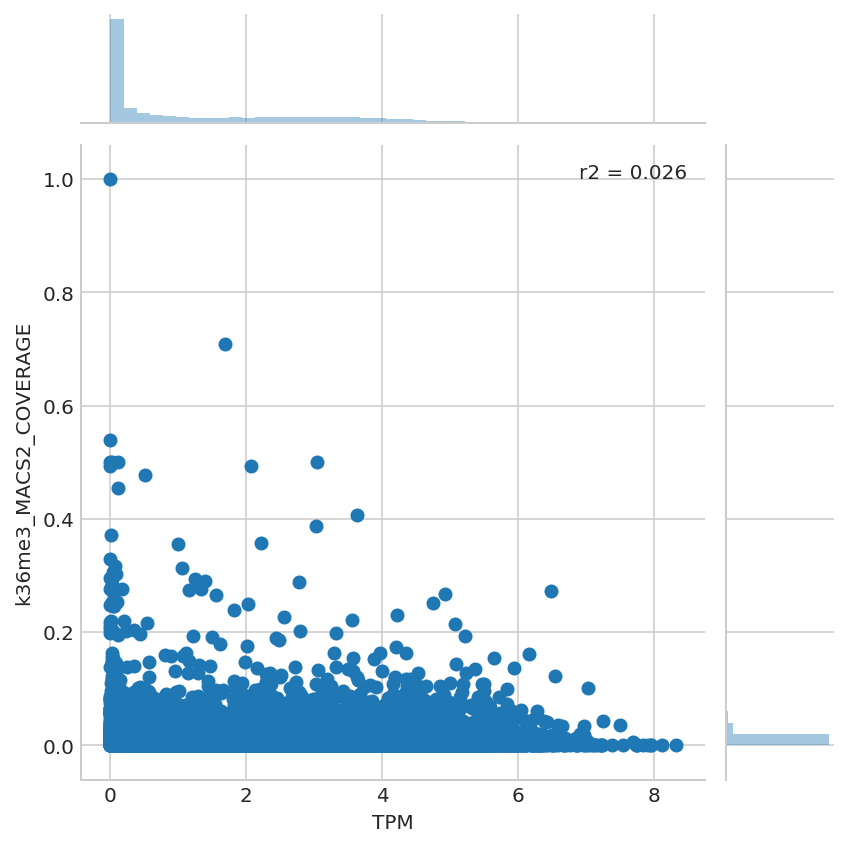

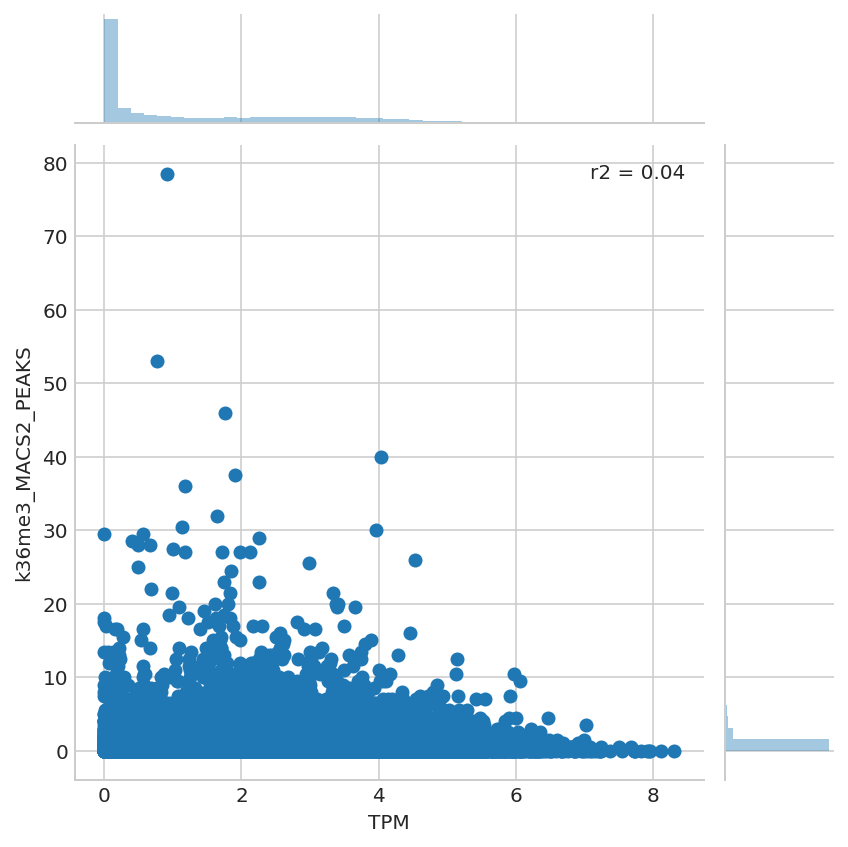

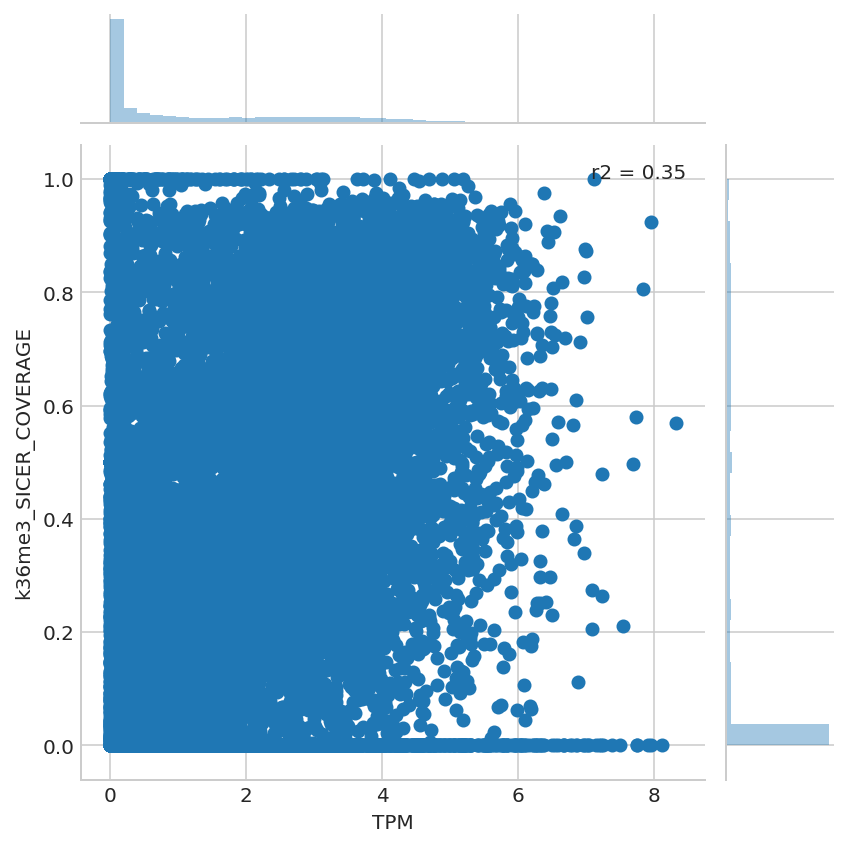

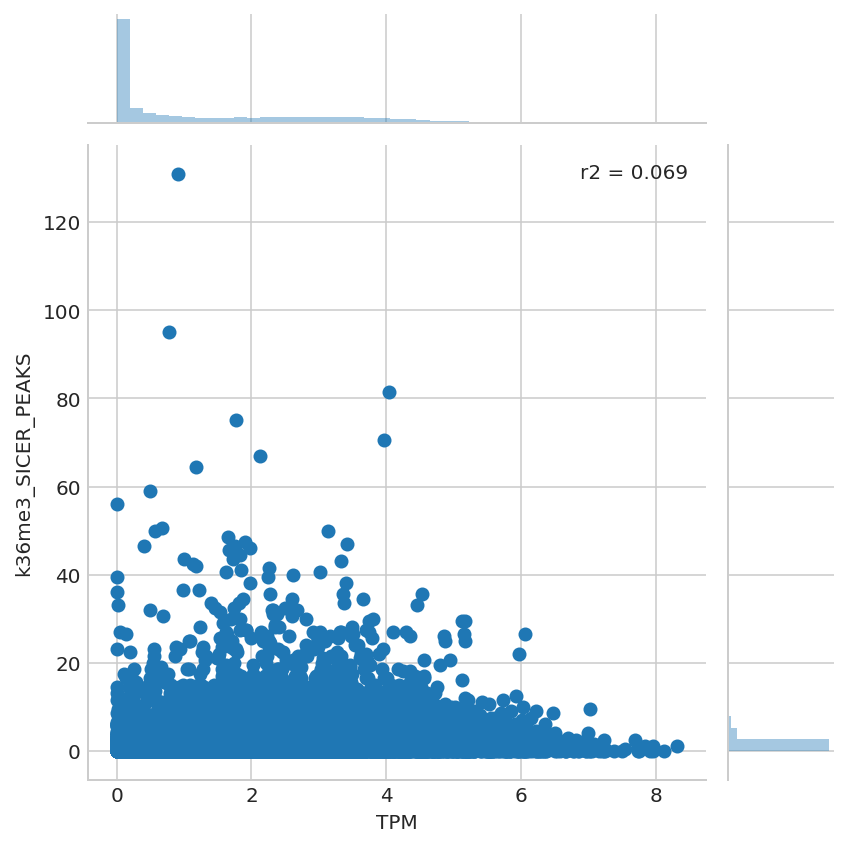

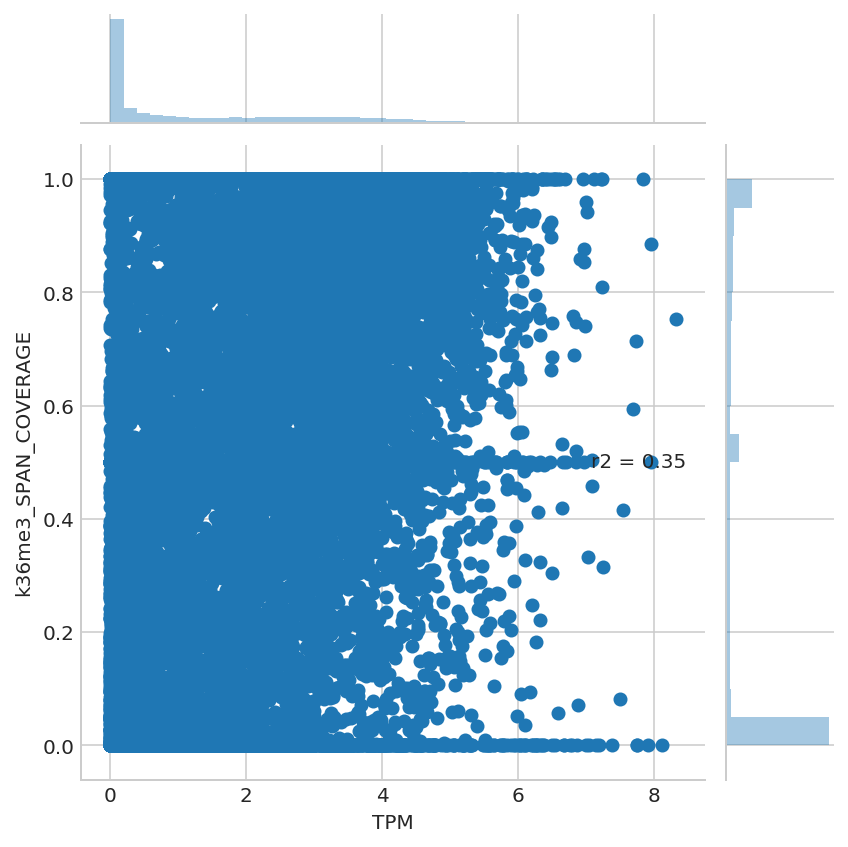

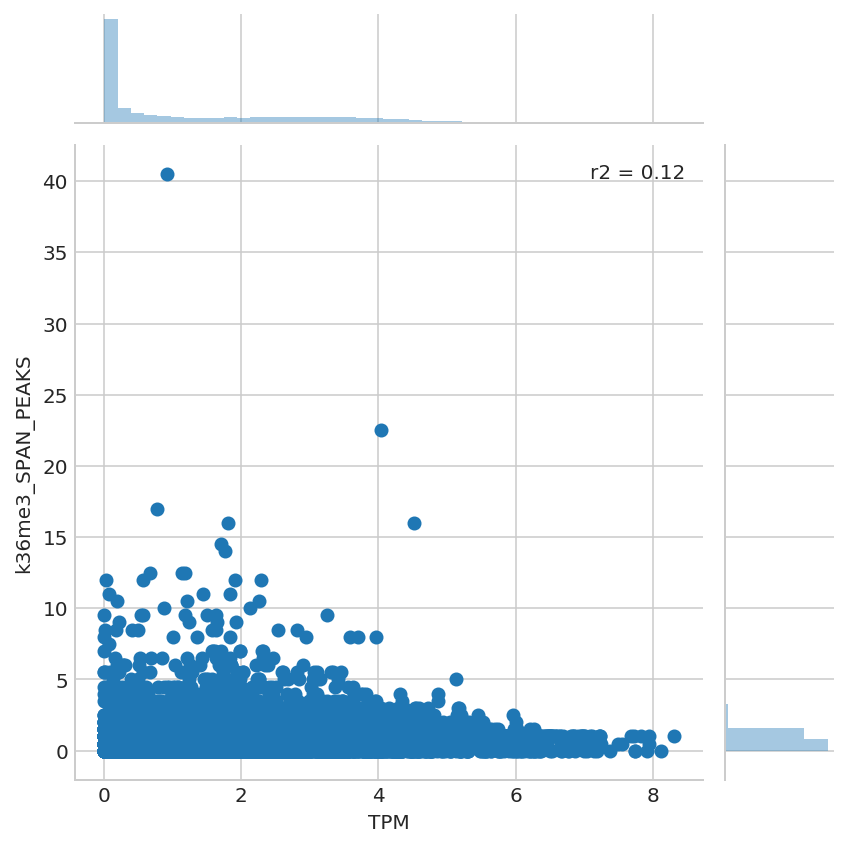

In [7]:
print('Compute average coverage/peaks')
for tool in TOOLS:
    dff['k36me3_{}_COVERAGE'.format(tool)] =\
        (dff['k36me3_{}_COVERAGE_0'.format(tool)] + dff['k36me3_{}_COVERAGE_1'.format(tool)]) / 2
    dff['k36me3_{}_PEAKS'.format(tool)] =\
        (dff['k36me3_{}_PEAKS_0'.format(tool)] + dff['k36me3_{}_PEAKS_1'.format(tool)]) / 2
        
print("Transcription vs TOOLS coverage/peaks")
for tool in TOOLS:
    with PdfPages(os.path.join(FOLDER, 'gse112622_transcription_vs_{}_coverage.pdf'.format(tool))) as pdf:
        plt.figure(figsize=(5, 5))
        sns.jointplot(dff['TPM'], dff['k36me3_{}_COVERAGE'.format(tool)], stat_func=r2)        
        plt.tight_layout()
        pdf.savefig()
    with PdfPages(os.path.join(FOLDER, 'gse112622_transcription_vs_{}_peaks.pdf'.format(tool))) as pdf:
        plt.figure(figsize=(5, 5))
        sns.jointplot(dff['TPM'], dff['k36me3_{}_PEAKS'.format(tool)], stat_func=r2)        
        plt.tight_layout()
        pdf.savefig()

# RNA-Seq expressed / not expressed vs ChIP-Seq

Processing per sample
Processing average values


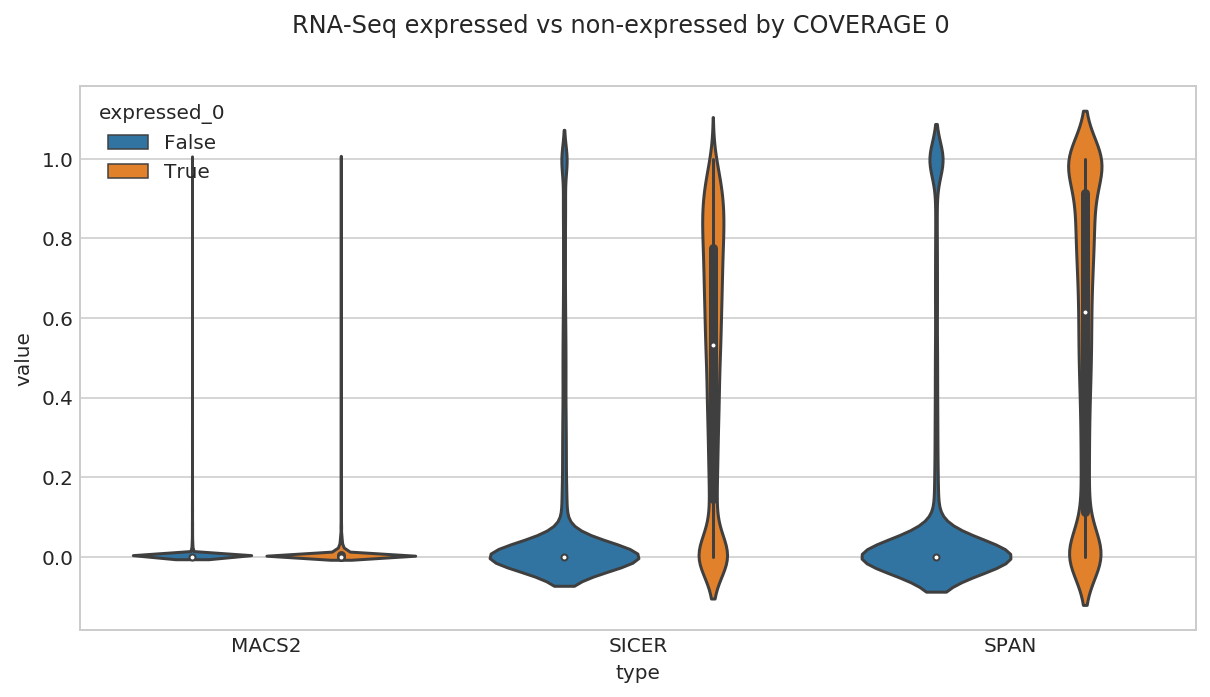

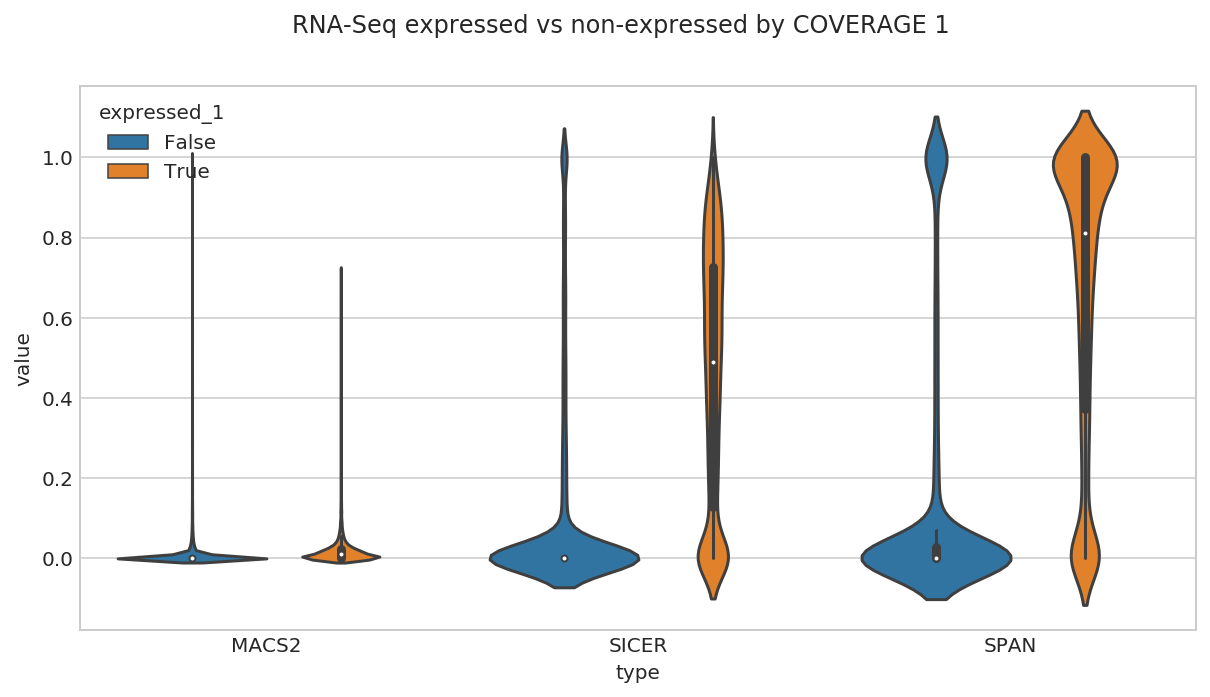

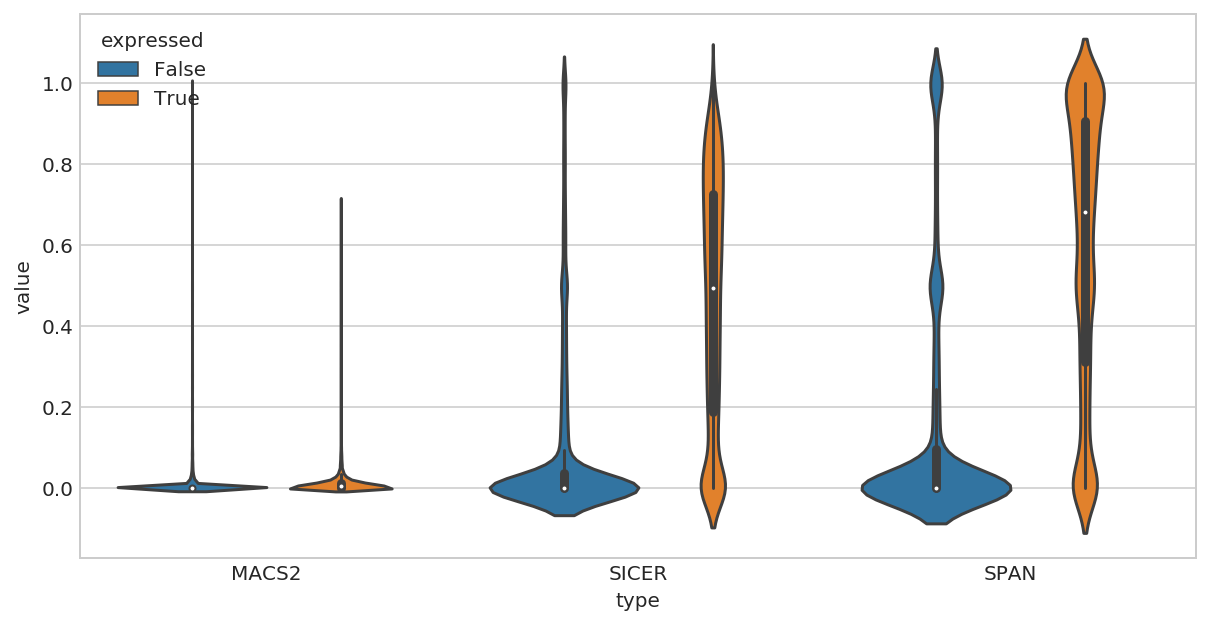

In [8]:
def mod(x):
    if "expr" in x:
        return "Expression"
    if "RPKM" in x:
        return "RPKM"
    if "MACS2" in x:
        return "MACS2"
    if "SICER" in x:
        return "SICER"
    if "SPAN" in x: 
        return "SPAN"
    return "NA"

print('Processing per sample')    
for sample in [0, 1]:
    # Split expressed and not expressed genes
    dff['expressed_{}'.format(sample)] = dff['TPM_{}'.format(sample)] > 1
    with PdfPages(os.path.join(FOLDER, 'gse112622_transcription_vs_coverage_{}.pdf'.format(sample))) as pdf:
        plt.figure(figsize=(10, 5))
        dfm = pd.melt(dff, id_vars=['expressed_{}'.format(sample)], 
                value_vars=['k36me3_MACS2_COVERAGE_{}'.format(sample), 
                            'k36me3_SICER_COVERAGE_{}'.format(sample),
                            'k36me3_SPAN_COVERAGE_{}'.format(sample)])
        dfm['type'] = [mod(x) for x in dfm['variable']]
        sns.violinplot(x='type', y='value', hue='expressed_{}'.format(sample), data=dfm)
        plt.suptitle('RNA-Seq expressed vs non-expressed by COVERAGE {}'.format(sample))
        pdf.savefig()


print('Processing average values')
with PdfPages(os.path.join(FOLDER, 'gse112622_summary_transcription_vs_coverage.pdf')) as pdf:
    plt.figure(figsize=(10, 5))
    # Split expressed and not expressed genes
    dff['expressed'] = dff['TPM'] > 1
    dfm = pd.melt(dff, id_vars=['expressed'], 
            value_vars=['k36me3_MACS2_COVERAGE', 
                        'k36me3_SICER_COVERAGE',
                        'k36me3_SPAN_COVERAGE'])
    dfm['type'] = [mod(x) for x in dfm["variable"]]
    sns.violinplot(x='type', y='value', hue='expressed', data=dfm)
    pdf.savefig()

# Difference in k36me3 intersect => RNA-Seq?

Processing MACS2
Processing SICER
Processing SPAN


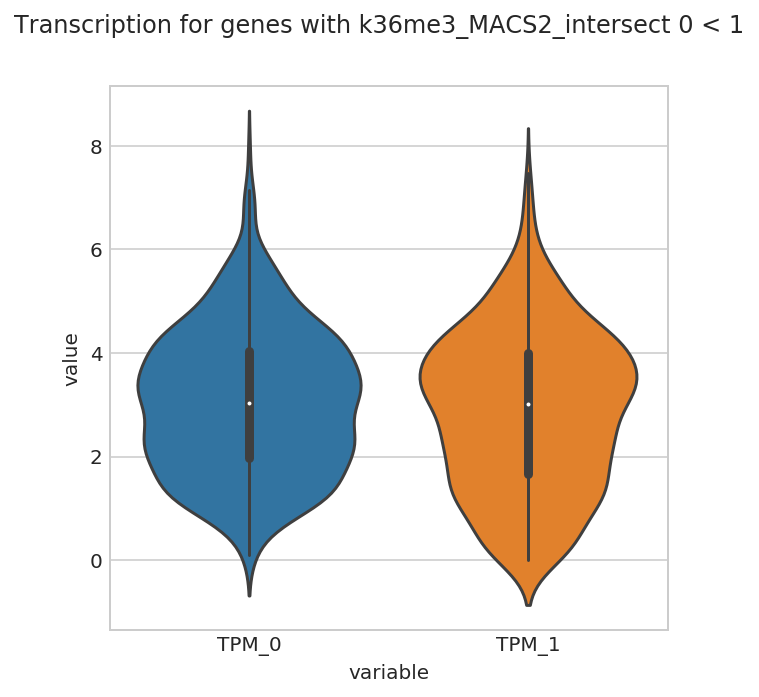

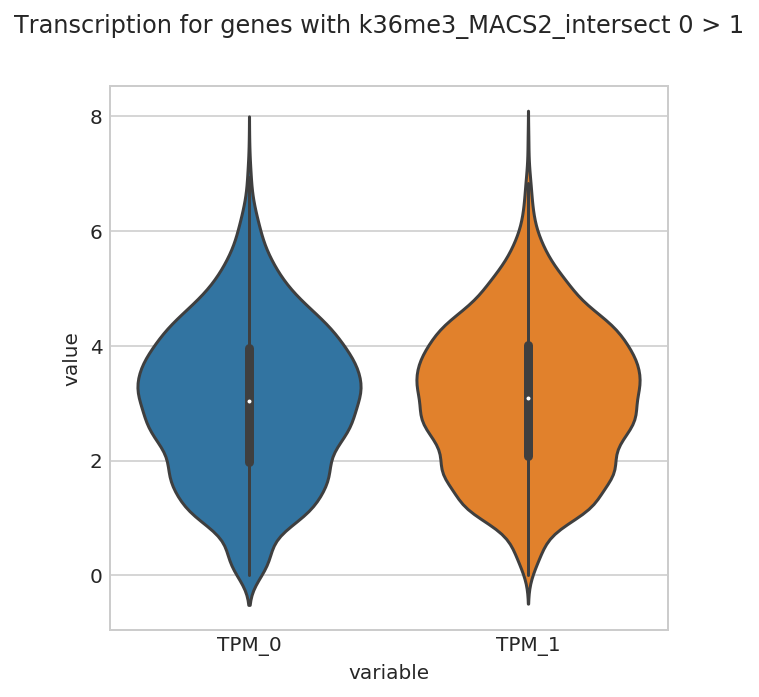

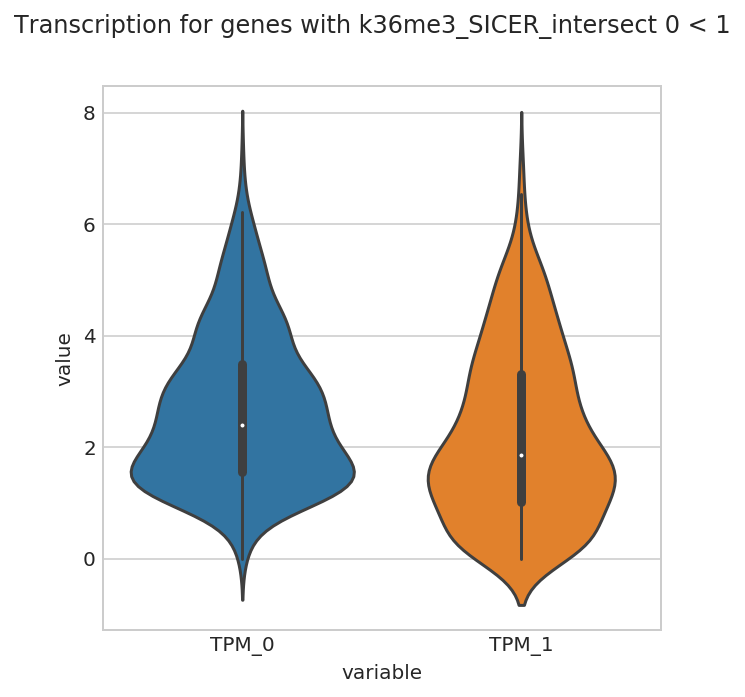

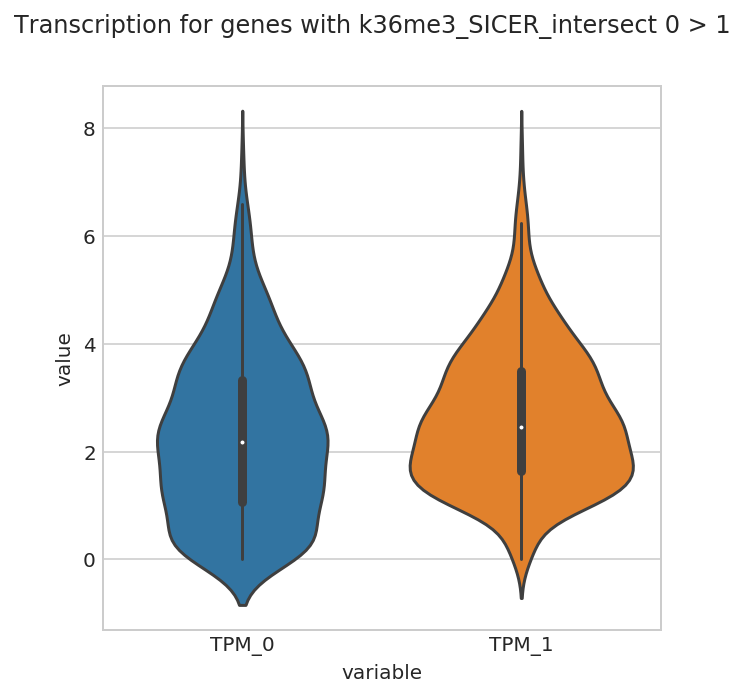

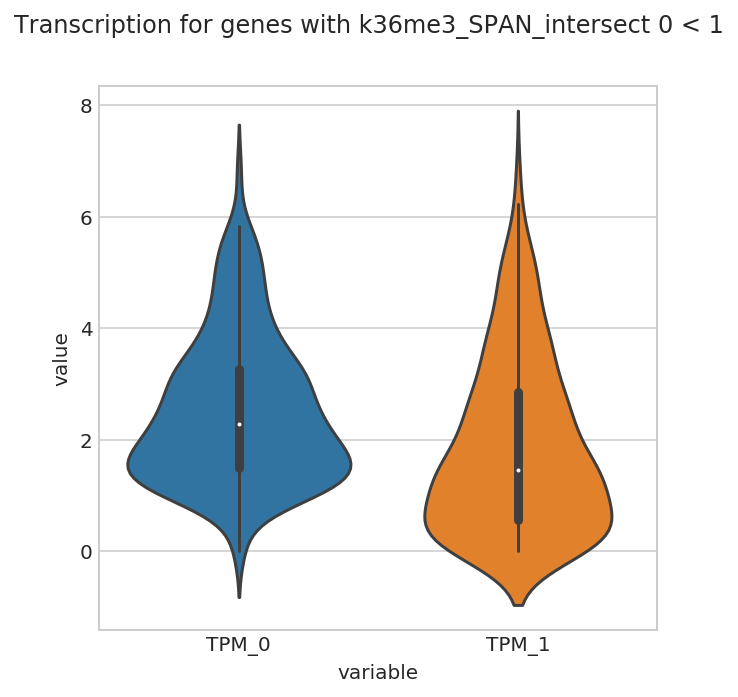

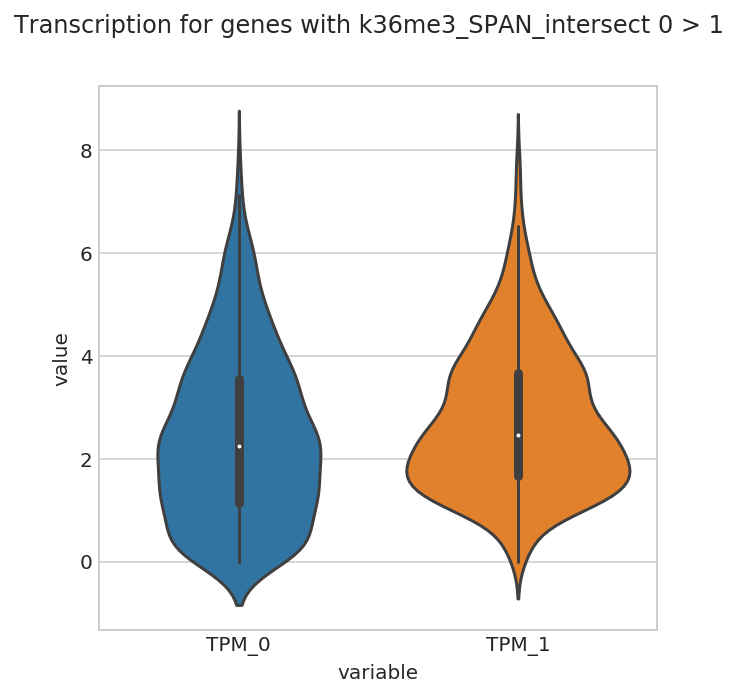

In [9]:
##########################################################
# Work only with genes, expressed in at least one sample #
##########################################################
dft = dff.loc[np.logical_or(dff['TPM_0'] > 1, dff['TPM_1'] > 1)]

for tool in TOOLS:
    print('Processing', tool)
    with PdfPages(os.path.join(FOLDER, 'gse112622_{}_t_1.pdf'.format(tool))) as pdf:
        plt.figure(figsize=(5, 5))
        diff = dft.loc[np.logical_and(dft['k36me3_{}_intersect_0'.format(tool)],
                                      np.logical_not(dft['k36me3_{}_intersect_1'.format(tool)]))]
        if len(diff) > 0:
            sns.violinplot(x="variable", y="value", data=pd.melt(diff, value_vars=['TPM_0', 'TPM_1']))
            plt.suptitle('Transcription for genes with k36me3_{}_intersect 0 and not 1'.format(tool))
            pdf.savefig()
        else:
            print('NOTHING 0 < 1')
        
    with PdfPages(os.path.join(FOLDER, 'gse112622_{}_t_0.pdf'.format(tool))) as pdf:
        plt.figure(figsize=(5, 5))
        diff = dft.loc[np.logical_and(dft['k36me3_{}_intersect_1'.format(tool)],
                                      np.logical_not(dft['k36me3_{}_intersect_0'.format(tool)]))]
        if len(diff) > 0:
            sns.violinplot(x="variable", y="value", data=pd.melt(diff, value_vars=['TPM_0', 'TPM_1']))
            plt.suptitle('Transcription for genes with k36me3_{}_intersect 1 and not 0'.format(tool))
            pdf.savefig()
        else:
            print('NOTHIN 0 > 1')

# Hierarchical clustering

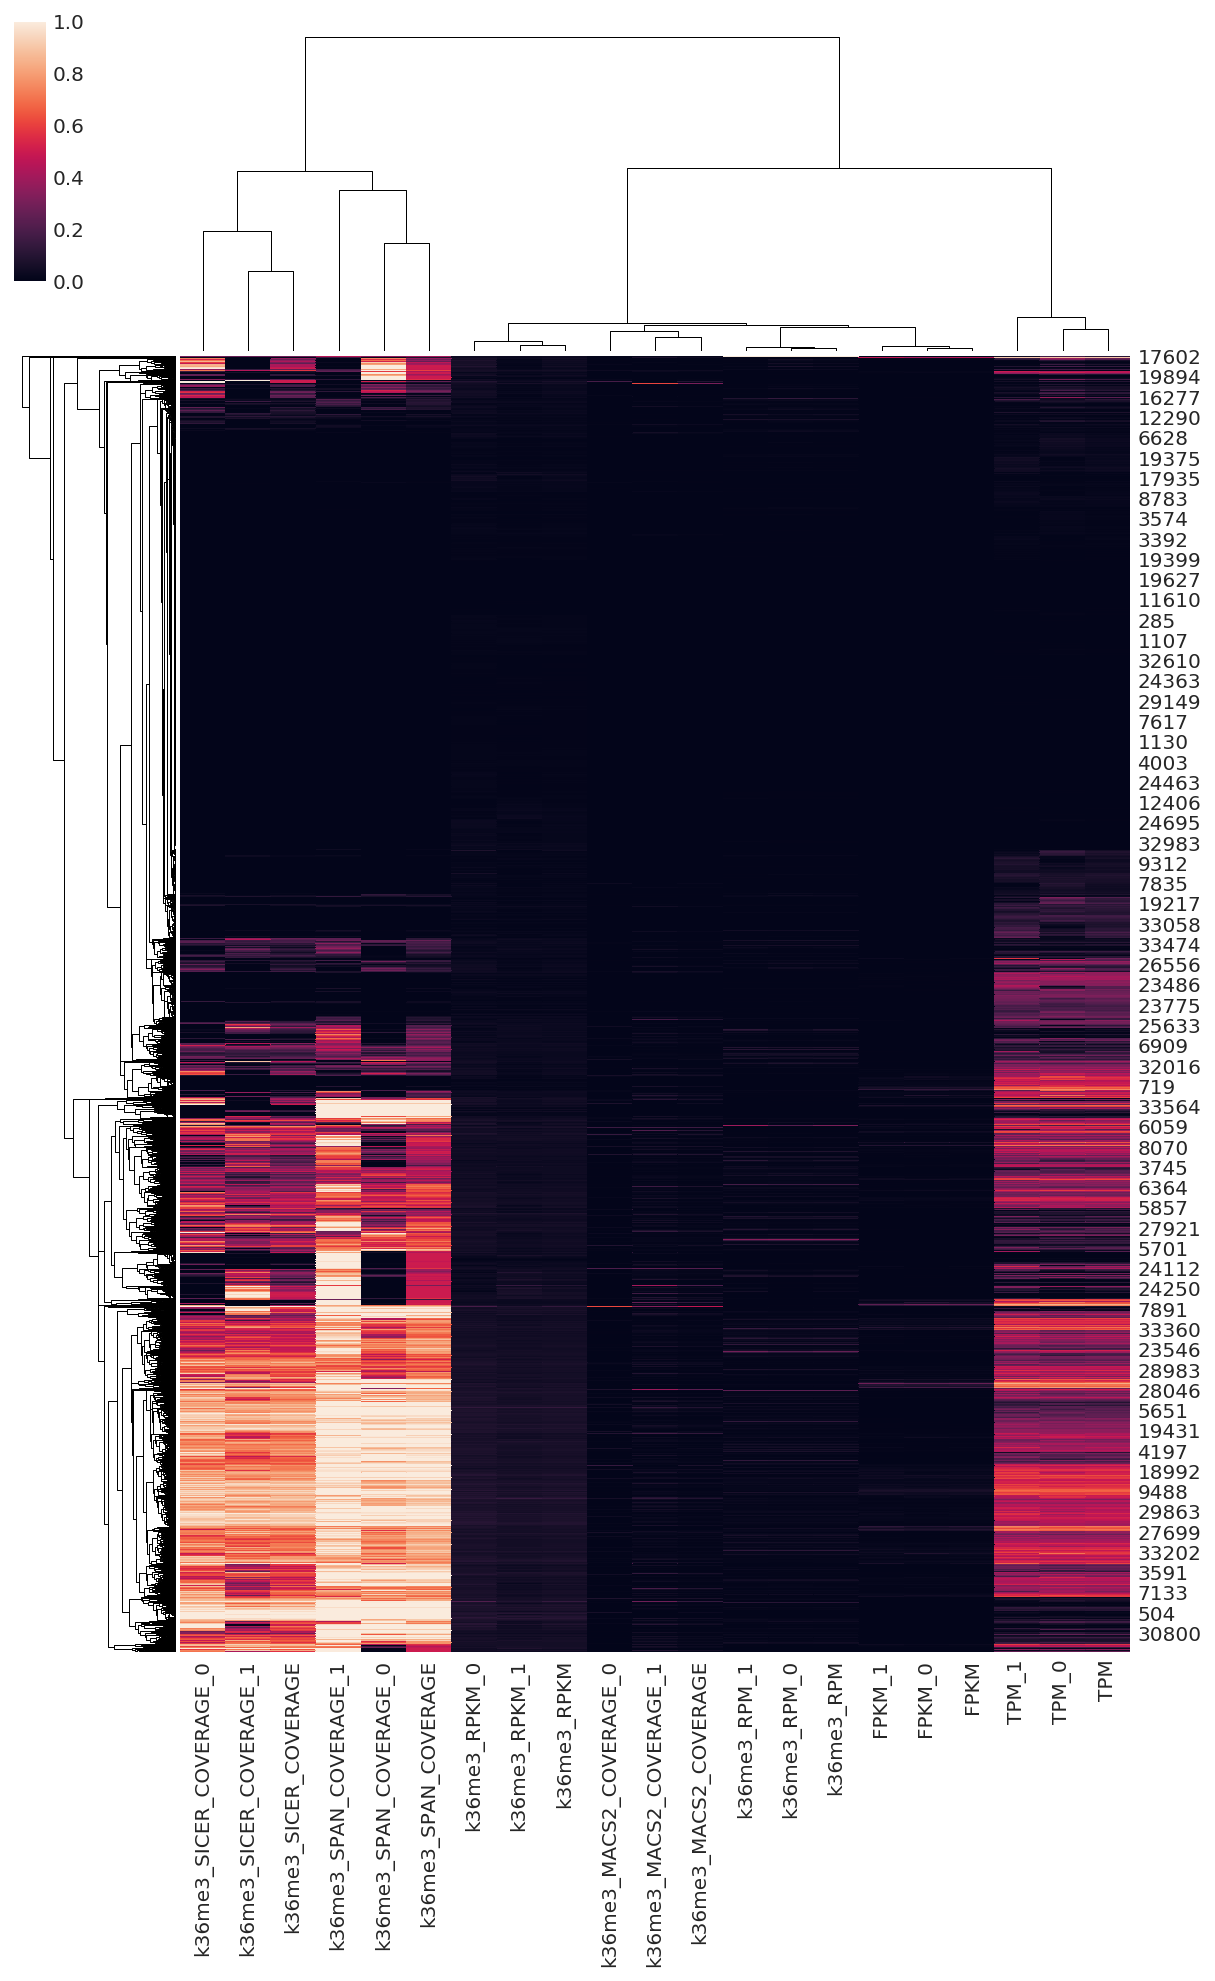

In [10]:
dff['k36me3_RPKM'] = (dff['k36me3_RPKM_0'] + dff['k36me3_RPKM_1']) / 2
dff['k36me3_RPM'] = (dff['k36me3_RPM_0'] + dff['k36me3_RPM_1']) / 2

dfc = dff[['k36me3_RPKM_0', 'k36me3_RPKM_1', 'k36me3_RPKM',
           'k36me3_RPM_0', 'k36me3_RPM_1', 'k36me3_RPM',
           'TPM_0', 'TPM_1', 'TPM', 
           'FPKM_0', 'FPKM_1', 'FPKM',
           'k36me3_MACS2_COVERAGE_0','k36me3_MACS2_COVERAGE_1', 'k36me3_MACS2_COVERAGE', 
           'k36me3_SICER_COVERAGE_0', 'k36me3_SICER_COVERAGE_1', 'k36me3_SICER_COVERAGE',
           'k36me3_SPAN_COVERAGE_0', 'k36me3_SPAN_COVERAGE_1', 'k36me3_SPAN_COVERAGE']]

with PdfPages(os.path.join(FOLDER, 'gse112622_clustering.pdf')) as pdf:
    sns.clustermap(dfc, standard_scale=True, figsize=(10, 15))
    pdf.savefig()

# RSEM DE vs intersection / coverage

In [11]:
de = pd.read_csv('/mnt/stripe/bio/raw-data/geo-samples/GSE112622/rnaseq/fastq_bams_rsem/diff.tsv', 
                 sep='\t', comment='#').dropna()
de.index.name = 'gene_id'
display(de.head(1))

,baseMean,log2FoldChange,lfcSE,pvalue,padj
gene_id,,,,,
ENSMUSG00000000001,3926.213902,0.161344,0.17126,0.340266,0.516428


# Top DE genes

In [17]:
top_genes_0 = de.loc[de['log2FoldChange'] > 0].sort_values(by=['padj'])[:500]
display(top_genes_0.head(1))
top_genes_1 = de.loc[de['log2FoldChange'] < 0].sort_values(by=['padj'])[:500]
display(top_genes_1.head(1))

de0 = set(list(top_genes_0.index))
dfde0 = dff.loc[[g in de0 for g in dff['gene_id']]] 
dfde0['de'] = 0

de1 = set(list(top_genes_1.index))
dfde1 = dff.loc[[g in de1 for g in dff['gene_id']]] 
dfde1['de'] = 1

dfde = pd.concat([dfde0, dfde1])
display(dfde.head(3))

,baseMean,log2FoldChange,lfcSE,pvalue,padj
gene_id,,,,,
ENSMUSG00000041653,5342.195824,7.448055,0.214868,4.812902e-264,8.967880e-260


,baseMean,log2FoldChange,lfcSE,pvalue,padj
gene_id,,,,,
ENSMUSG00000038770,8107.647033,-5.85578,0.18201,4.552347e-228,4.241194e-224


/home/user/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/user/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,gene_id,gene_symbol,coding,chr,start,end,FPKM_0_0,FPKM_0_1,FPKM_1_0,FPKM_1_1,...,k36me3_MACS2_COVERAGE,k36me3_MACS2_PEAKS,k36me3_SICER_COVERAGE,k36me3_SICER_PEAKS,k36me3_SPAN_COVERAGE,k36me3_SPAN_PEAKS,expressed,k36me3_RPKM,k36me3_RPM,de
57,ENSMUSG00000052105,1110012J17Rik,1,chr17,66686321,66799090,3.04,2.28,17.83,19.21,...,0.010415,2.0,0.282666,3.0,0.307709,1.0,True,60.233121,679.242884,0
69,ENSMUSG00000037455,1110021L09Rik,1,chr10,23516791,23547774,1.79,0.99,12.15,9.89,...,0.018801,2.0,0.346868,3.0,1.000000,1.0,True,83.853407,259.803012,0
252,ENSMUSG00000053783,1700016K19Rik,1,chr11,75813413,75817071,1.31,1.28,15.96,15.09,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,True,17.115564,6.260873,0


# Top DE genes vs k36me3 peaks intersection

In [18]:
for t in TOOLS:
    print('Processing {}'.format(t))
    for detype in [0, 1]:
        print('DE {}'.format(detype))
        dfdet = dfde.loc[dfde['de'] == detype]
        
        itt_filter = np.logical_and(
            dfdet['k36me3_{}_intersect_0'.format(t)], 
            dfdet['k36me3_{}_intersect_1'.format(t)])
        print('Intersection TRUE TRUE {}'.format(sum(itt_filter)))
#         print('\t'.join(dfdet.loc[itt_filter][:20]['gene_id']))

        itf_filter = np.logical_and(
            dfdet['k36me3_{}_intersect_0'.format(t)], 
            np.logical_not(dfdet['k36me3_{}_intersect_1'.format(t)]))
        print('Intersection TRUE FALSE {}'.format(sum(itf_filter)))
#         print('\t'.join(dfdet.loc[itf_filter][:20]['gene_id']))

        ift_filter = np.logical_and(
            np.logical_not(dfdet['k36me3_{}_intersect_0'.format(t)]), 
            dfdet['k36me3_{}_intersect_1'.format(t)])
        print('Intersection FALSE TRUE {}'.format(sum(ift_filter)))
#         print('\t'.join(dfdet.loc[ift_filter][:20]['gene_id']))

        iff_filter = np.logical_and(
            np.logical_not(dfdet['k36me3_{}_intersect_0'.format(t)]), 
            np.logical_not(dfdet['k36me3_{}_intersect_1'.format(t)]))
        print('Intersection FALSE FALSE {}'.format(sum(iff_filter)))
#         print('\t'.join(dfdet.loc[iff_filter][:20]['gene_id'])

Processing MACS2
DE 0
Intersection TRUE TRUE 79
Intersection TRUE FALSE 12
Intersection FALSE TRUE 177
Intersection FALSE FALSE 152
DE 1
Intersection TRUE TRUE 137
Intersection TRUE FALSE 56
Intersection FALSE TRUE 123
Intersection FALSE FALSE 159
Processing SICER
DE 0
Intersection TRUE TRUE 207
Intersection TRUE FALSE 9
Intersection FALSE TRUE 94
Intersection FALSE FALSE 110
DE 1
Intersection TRUE TRUE 255
Intersection TRUE FALSE 104
Intersection FALSE TRUE 9
Intersection FALSE FALSE 107
Processing SPAN
DE 0
Intersection TRUE TRUE 216
Intersection TRUE FALSE 4
Intersection FALSE TRUE 118
Intersection FALSE FALSE 82
DE 1
Intersection TRUE TRUE 289
Intersection TRUE FALSE 81
Intersection FALSE TRUE 17
Intersection FALSE FALSE 88


# Top DE genes vs k36me3 peaks coverage

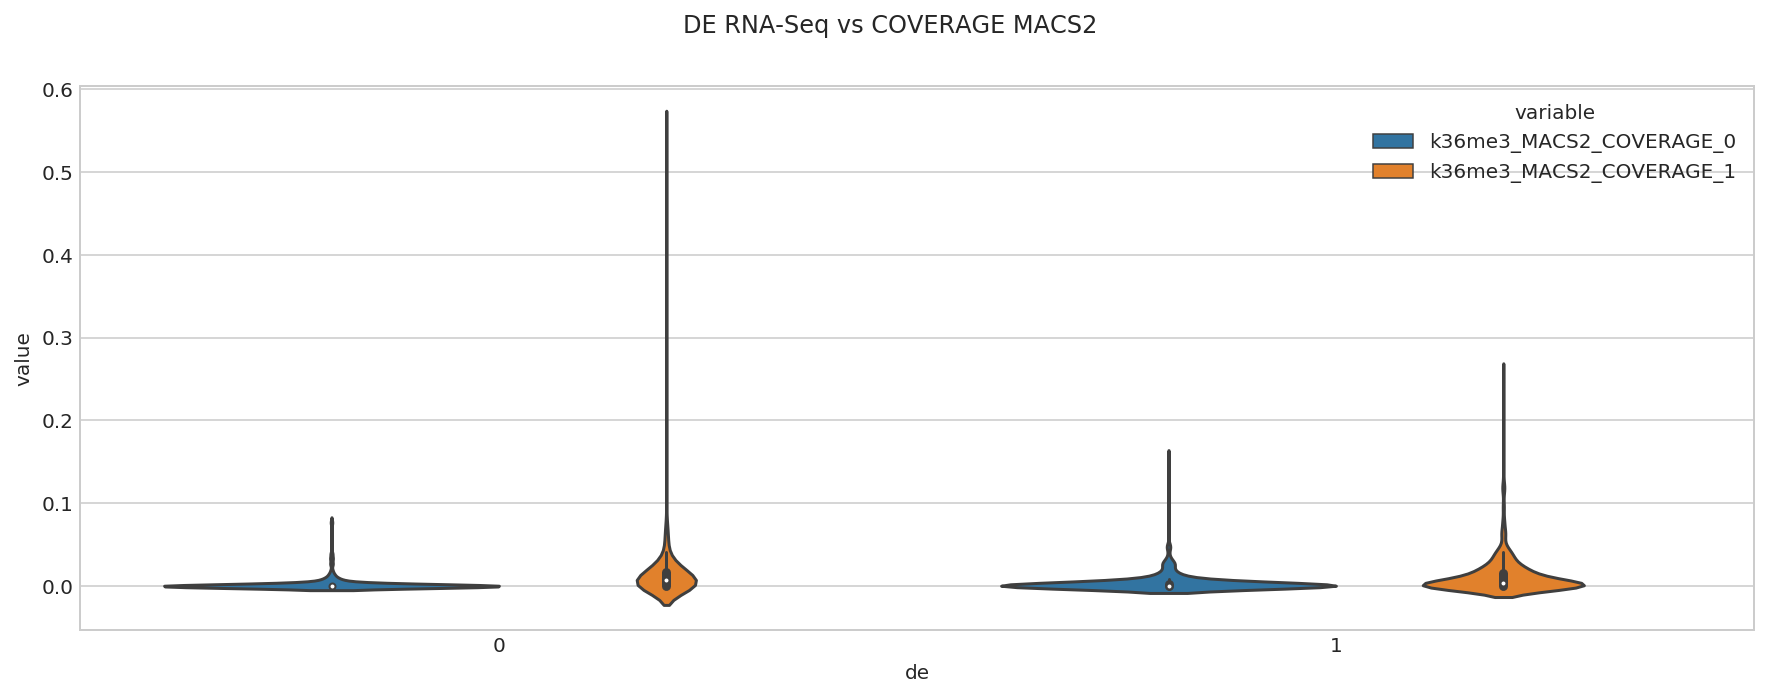

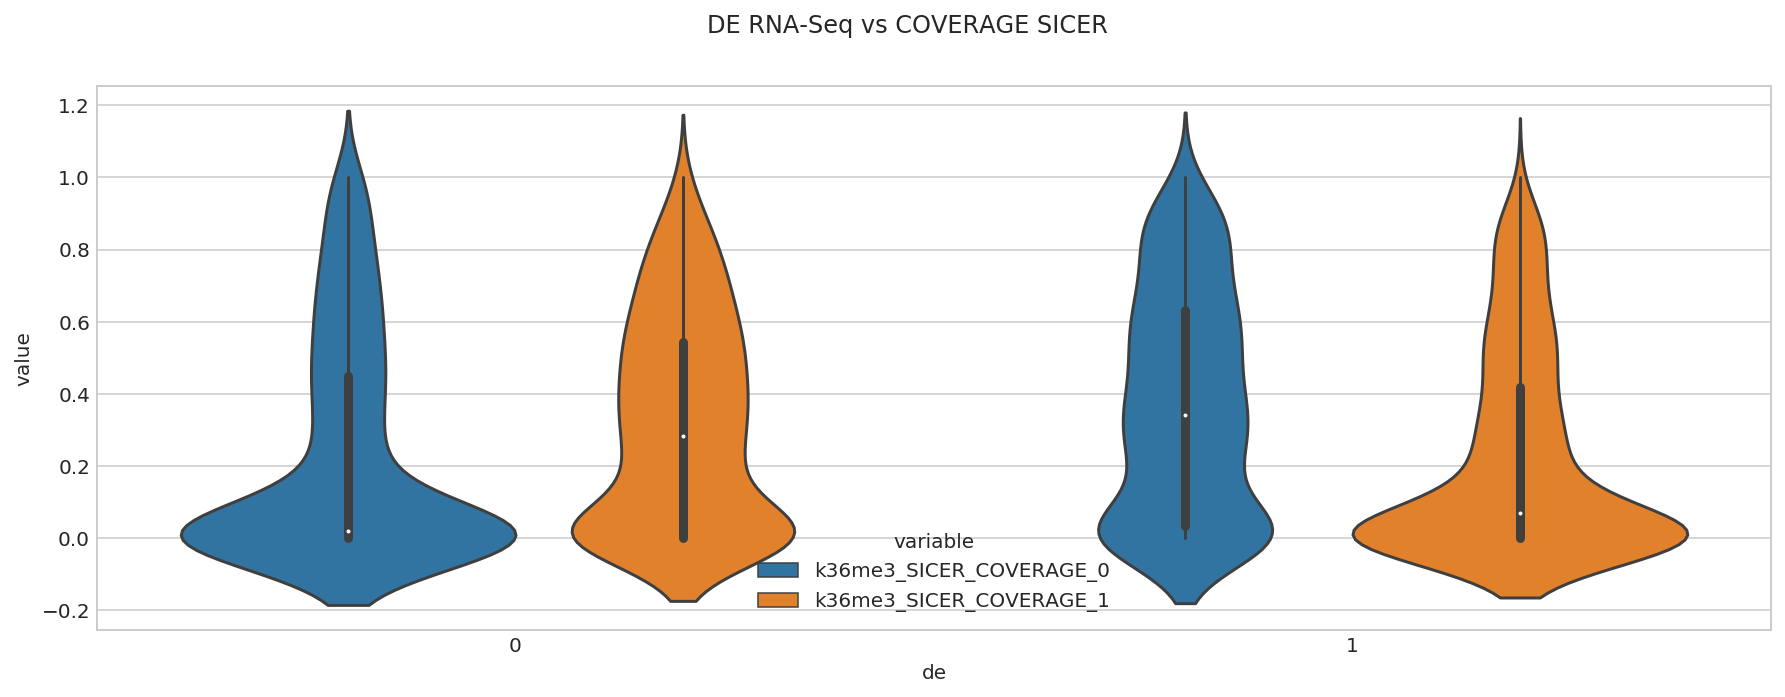

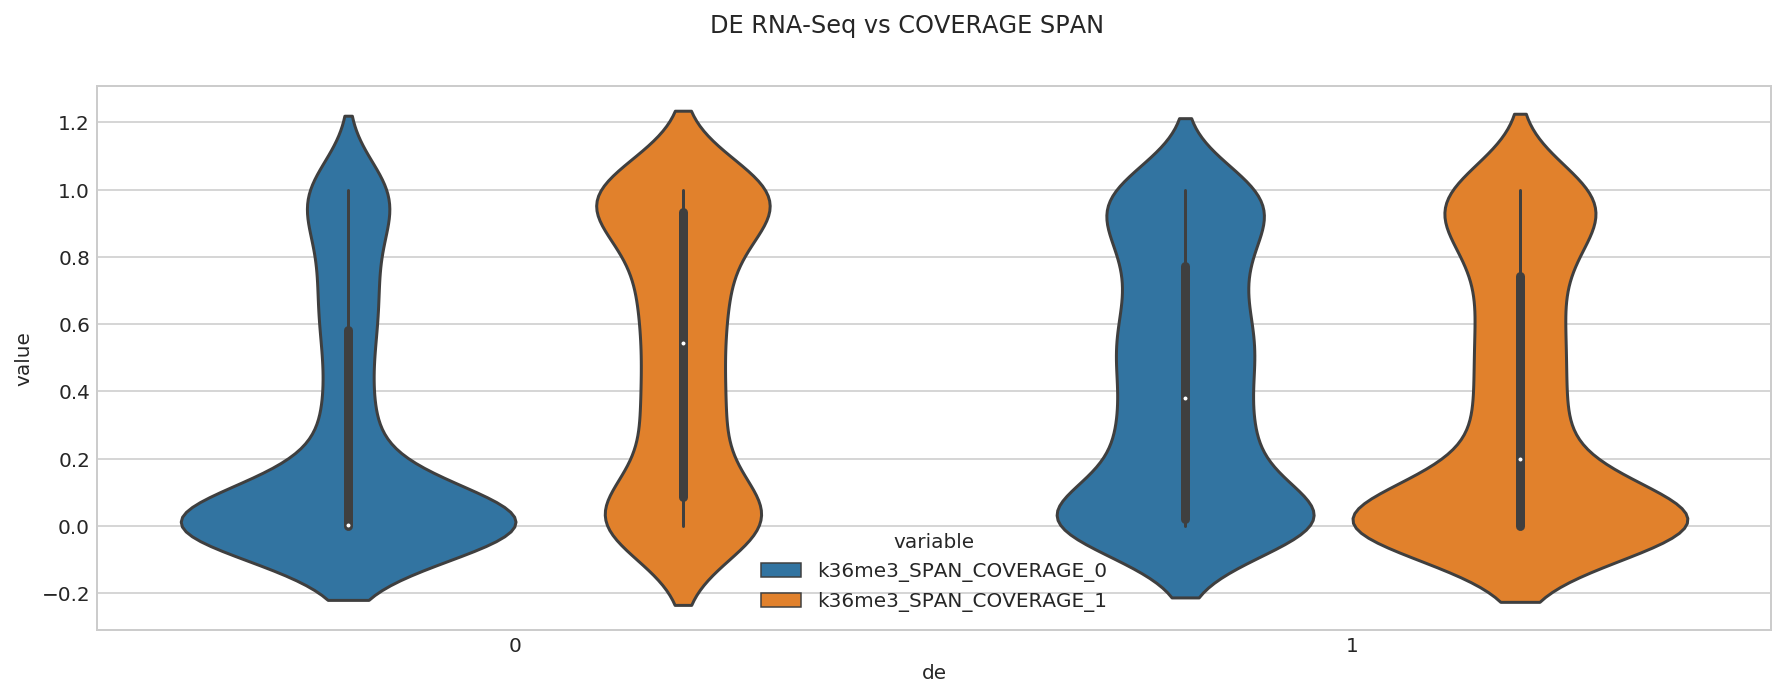

In [19]:
for t in TOOLS:
    with PdfPages(os.path.join(FOLDER, 'gse112622_de_vs_coverage_{}.pdf'.format(t))) as pdf:
        plt.figure(figsize=(15, 5))
        dfdem = pd.melt(dfde, id_vars=['de'], 
                value_vars=['k36me3_{}_COVERAGE_0'.format(t), 'k36me3_{}_COVERAGE_1'.format(t)])
        sns.violinplot(x='de', y='value', hue='variable', data=dfdem)
#         display(dfdem.head(20))
        plt.suptitle('DE RNA-Seq vs COVERAGE {}'.format(t))
        pdf.savefig()